In [2]:
#Importing Packages
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
import sympy as sy

In [18]:
P,P_e,P_b,P_u,E,E_b,E_u,S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,k_1,k_2,S_e,y,W,v_m,V,z = sy.symbols("P,P_e,P_b,P_u,E,E_b,E_u,S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,k_1,k_2,S_e,y,W,v_m,V,z")

dPdt    = y/(1+S) - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E + k_1*P_e - k_2*P
dP_edt  = k_2*P - k_1*P_e
dP_bdt  = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
dP_udt  = a*P_b - g*(A_p/A_e)*P_u
dEdt    = g*(A_p/A_e)*P_u + b*E_u + j*E_b - (k/W)*S*E - f*(A_e/A_p)*E
dE_bdt  = (k/W)*S*E - j*E_b - a*E_b
dE_udt  = a*E_b - b*E_u - z*E_u
dSdt    = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))
dydt    = [dPdt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt, dSdt]

sol = sy.solvers.solve([dPdt, dP_edt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt],[P,P_e,P_b,P_u,E,E_b,E_u])
print('    P   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e:',sol[P])
print('    P_e = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e:',sol[P_e])
print('    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e:',sol[P_b])
print('    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e:',sol[P_u])
print('    E   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e:',sol[E])
print('    E_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e:',sol[E_b])
print('    E_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e:',sol[E_u])

    P   = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_p*S**3*a**2*k**2*z + A_p*S**2*S_e*W*a**2*k**2*z + A_p*S**2*a**2*k**2*z + A_p*S*S_e*W*a**2*k**2*z)
    P_e = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W**2*a**2*b*f*k_2*y + A_e*W**2*a**2*f*k_2*y*z + 2*A_e*W**2*a*b*f*j*k_2*y + 2*A_e*W**2*a*f*j*k_2*y*z + A_e*W**2*b*f*j**2*k_2*y + A_e*W**2*f*j**2*k_2*y*z + A_p*S*W*a**2*k*k_2*y*z + A_p*S*W*a*j*k*k_2*y*z)/(A_p*S**3*a**2*k**2*k_1*z + A_p*S**2*S_e*W*a**2*k**2*k_1*z + A_p*S**2*a**2*k**2*k_1*z + A_p*S*S_e*W*a**2*k**2*k_1*z)
    P_b = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,S_e: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_p*S**2*a**2*k*z + A_p*S*a**2*k*z)
    P_u = lambda S,a,b,A_p,j,K_d,K_m,k,k_1,k_2,V_m,V,W,y,z,f,A_e,g,

In [11]:
P   = lambda S: (A_e*W**2*a**2*b*f*y + A_e*W**2*a**2*f*y*z + 2*A_e*W**2*a*b*f*j*y + 2*A_e*W**2*a*f*j*y*z + A_e*W**2*b*f*j**2*y + A_e*W**2*f*j**2*y*z + A_p*S*W*a**2*k*y*z + A_p*S*W*a*j*k*y*z)/(A_e*S**2*W*a**2*f*k*z + A_e*S**2*W*a*f*j*k*z + A_e*S*S_e*W**2*a**2*f*k*z + A_e*S*S_e*W**2*a*f*j*k*z + A_p*S**3*a**2*k**2*z + A_p*S**2*S_e*W*a**2*k**2*z)
P_b = lambda S: (A_e*W*a*b*f*y + A_e*W*a*f*y*z + A_e*W*b*f*j*y + A_e*W*f*j*y*z + A_p*S*a*k*y*z)/(A_e*S*W*a**2*f*z + A_e*S*W*a*f*j*z + A_p*S**2*a**2*k*z)
P_u = lambda S: (A_e**2*W*a*b*f*y + A_e**2*W*a*f*y*z + A_e**2*W*b*f*j*y + A_e**2*W*f*j*y*z + A_e*A_p*S*a*k*y*z)/(A_e*A_p*S*W*a*f*g*z + A_e*A_p*S*W*f*g*j*z + A_p**2*S**2*a*g*k*z)
E   = lambda S: (A_p*W*a*b*y + A_p*W*b*j*y)/(A_e*S*W*a*f*z + A_e*S*W*f*j*z + A_p*S**2*a*k*z)
E_b = lambda S: A_p*b*k*y/(A_e*W*a*f*z + A_e*W*f*j*z + A_p*S*a*k*z)
E_u = lambda S: y/(S*z)

In [33]:
dSdt = sy.lambdify([S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z], -(k/W)*S*((A_p/V)*P(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)+(A_e/V)*E(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)) + (j+a)*((A_p/V)*P_b(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)+(A_e/V)*E_b(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z)) - (v_m*S)/(V*(K_m+S)),"numpy")
S = np.linspace(0,10,1000)

#Defining Variables
A_e = 47
A_p = 314
a = 1
b = 1
f = .1
g = .1
j = 10**2
K_m = 2.5
K_d = .74
k = j/K_d
y = .000083
W = 32
v_m = 8.8 * 10**3
V = 523
z = .002

print(dSdt(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z))
plt.plot(S,dSdt(S,A_e,A_p,a,b,f,g,j,K_m,K_d,k,S_e,y,W,v_m,V,z))
plt.show()

NotImplementedError: unhandled type: <class 'numpy.ndarray'>, [nan
 244.996014178851 - 103.631405194302/(1351.85123055144*S_e + 0.422876385933257)
 119.159811656035 - 207.274377439562/(2777.24611474964*S_e + 1.73751633805658)
 77.2819374135632 - 310.928916735781/(4276.1846525946*S_e + 4.0129360478553)
 56.3877316788651 - 414.595023082957/(5848.66684408634*S_e + 7.31815170681474)
 43.8827523652656 - 518.272696481092/(7494.69268922484*S_e + 11.7221795064202)
 35.5692110524888 - 621.961936930184/(9214.26218801011*S_e + 17.2940356381571)
 29.6483269185865 - 725.662744430235/(11007.3753404421*S_e + 24.1027362935107)
 25.2209195849999 - 829.375118981244/(12874.0321465209*S_e + 32.2172976639663)
 21.7876100024872 - 933.099060583212/(14814.2326062465*S_e + 41.7067359410093)
 19.048903298887 - 1036.83456923614/(16827.9767196188*S_e + 52.640067316125)
 16.8143192735842 - 1140.58164494002/(18915.2644866379*S_e + 65.0863079807987)
 14.956959152415 - 1244.34028769486/(21076.0959073038*S_e + 79.1144741265158)
 13.3890427244467 - 1348.11049750066/(23310.4709816164*S_e + 94.7935819447615)
 12.0479305139415 - 1451.89227435742/(25618.3897095758*S_e + 112.192647627021)
 10.8877378486293 - 1555.68561826514/(27999.852091182*S_e + 131.38068736478)
 9.87409427259402 - 1659.49052922381/(30454.8581264349*S_e + 152.426717349524)
 8.98075308437619 - 1763.30700723344/(32983.4078153346*S_e + 175.399753772738)
 8.18733144485377 - 1867.13505229403/(35585.5011578811*S_e + 200.368812825907)
 7.47776447879489 - 1970.97466440558/(38261.1381540743*S_e + 227.402910700517)
 6.83922343129052 - 2074.82584356809/(41010.3188039143*S_e + 256.571063588052)
 6.26134316055732 - 2178.68858978155/(43833.0431074011*S_e + 287.942287679999)
 5.73566051431392 - 2282.56290304598/(46729.3110645346*S_e + 321.585599167843)
 5.25519938497821 - 2386.44878336136/(49699.1226753149*S_e + 357.570014243069)
 4.8141596434425 - 2490.3462307277/(52742.4779397419*S_e + 395.964549097162)
 4.40768084965338 - 2594.255245145/(55859.3768578158*S_e + 436.838219921607)
 4.03166059457975 - 2698.17582661325/(59049.8194295364*S_e + 480.260042907891)
 3.68261329878571 - 2802.10797513247/(62313.8056549037*S_e + 526.299034247498)
 3.35755934410527 - 2906.05169070264/(65651.3355339178*S_e + 575.024210131913)
 3.05393720872238 - 3010.00697332377/(69062.4090665787*S_e + 626.504586752622)
 2.76953323147639 - 3113.97382299585/(72547.0262528864*S_e + 680.809180301111)
 2.50242501887797 - 3217.9522397189/(76105.1870928408*S_e + 738.007006968864)
 2.25093550560386 - 3321.94222349291/(79736.891586442*S_e + 798.167082947367)
 2.01359540445319 - 3425.94377431787/(83442.1397336899*S_e + 861.358424428106)
 1.78911231492445 - 3529.95689219379/(87220.9315345847*S_e + 927.650047602565)
 1.57634515558859 - 3633.98157712067/(91073.2669891261*S_e + 997.110968662229)
 1.37428288239765 - 3738.0178290985/(94999.1460973144*S_e + 1069.81020379859)
 1.18202667975765 - 3842.0656481273/(98998.5688591494*S_e + 1145.81676920312)
 0.998774982633112 - 3946.12503420705/(103071.535274631*S_e + 1225.19968106731)
 0.823810819798614 - 4050.19598733777/(107218.04534376*S_e + 1308.02795558265)
 0.656491070509809 - 4154.27850751944/(111438.099066535*S_e + 1394.37060894063)
 0.496237306578663 - 4258.37259475206/(115731.696442957*S_e + 1484.29665733272)
 0.342527954450745 - 4362.47824903565/(120098.837473026*S_e + 1577.87511695042)
 0.194891561375723 - 4466.59547037019/(124539.522156742*S_e + 1675.1750039852)
 0.0529009891189935 - 4570.7242587557/(129053.750494104*S_e + 1776.26533462856)
 -0.0838316098632363 - 4674.86461419216/(133641.522485113*S_e + 1881.21512507198)
 -0.215659153555988 - 4779.01653667958/(138302.838129769*S_e + 1990.09339150694)
 -0.342903428142475 - 4883.18002621795/(143037.697428072*S_e + 2102.96915012493)
 -0.46585840509276 - 4987.35508280729/(147846.100380021*S_e + 2219.91141711744)
 -0.584793146736973 - 5091.54170644758/(152728.046985617*S_e + 2340.98920867594)
 -0.69995435836694 - 5195.73989713883/(157683.53724486*S_e + 2466.27154099194)
 -0.811568635766 - 5299.94965488104/(162712.57115775*S_e + 2595.8274302569)
 -0.919844449509354 - 5404.17097967421/(167815.148724287*S_e + 2729.72589266232)
 -1.02497390110649 - 5508.40387151833/(172991.26994447*S_e + 2868.03594439968)
 -1.12713428083471 - 5612.64833041342/(178240.9348183*S_e + 3010.82660166047)
 -1.22648945274736 - 5716.90435635946/(183564.143345777*S_e + 3158.16688063618)
 -1.32319108867877 - 5821.17194935646/(188960.8955269*S_e + 3310.12579751828)
 -1.41737976998678 - 5925.45110940442/(194431.191361671*S_e + 3466.77236849826)
 -1.50918597317191 - 6029.74183650334/(199975.030850088*S_e + 3628.17560976761)
 -1.59873095330944 - 6134.04413065321/(205592.413992152*S_e + 3794.40453751782)
 -1.68612753735921 - 6238.35799185404/(211283.340787862*S_e + 3965.52816794036)
 -1.77148083782404 - 6342.68342010583/(217047.81123722*S_e + 4141.61551722673)
 -1.85488889586625 - 6447.02041540858/(222885.825340224*S_e + 4322.73560156841)
 -1.93644326182542 - 6551.36897776229/(228797.383096875*S_e + 4508.95743715688)
 -2.01622952007943 - 6655.72910716695/(234782.484507173*S_e + 4700.35004018364)
 -2.09432776432904 - 6760.10080362258/(240841.129571117*S_e + 4896.98242684016)
 -2.17081302864212 - 6864.48406712916/(246973.318288708*S_e + 5098.92361331793)
 -2.24575567895103 - 6968.8788976867/(253179.050659946*S_e + 5306.24261580844)
 -2.31922176913841 - 7073.2852952952/(259458.326684831*S_e + 5519.00845050316)
 -2.39127336536285 - 7177.70325995465/(265811.146363363*S_e + 5737.2901335936)
 -2.46196884185374 - 7282.13279166507/(272237.509695541*S_e + 5961.15668127123)
 -2.53136315103708 - 7386.57389042644/(278737.416681366*S_e + 6190.67710972754)
 -2.59950807053217 - 7491.02655623877/(285310.867320838*S_e + 6425.92043515401)
 -2.66645242927773 - 7595.49078910206/(291957.861613956*S_e + 6666.95567374212)
 -2.73224231479874 - 7699.96658901631/(298678.399560722*S_e + 6913.85184168338)
 -2.79692126340812 - 7804.45395598151/(305472.481161134*S_e + 7166.67795516925)
 -2.86053043494612 - 7908.95288999767/(312340.106415193*S_e + 7425.50303039122)
 -2.92310877349146 - 8013.46339106479/(319281.275322899*S_e + 7690.39608354079)
 -2.98469315532931 - 8117.98545918287/(326295.987884251*S_e + 7961.42613080943)
 -3.04531852532918 - 8222.51909435191/(333384.24409925*S_e + 8238.66218838863)
 -3.10501802276878 - 8327.06429657191/(340546.043967896*S_e + 8522.17327246987)
 -3.16382309753612 - 8431.62106584286/(347781.387490189*S_e + 8812.02839924465)
 -3.22176361754989 - 8536.18940216477/(355090.274666128*S_e + 9108.29658490445)
 -3.27886796815566 - 8640.76930553764/(362472.705495715*S_e + 9411.04684564074)
 -3.33516314418252 - 8745.36077596147/(369928.679978948*S_e + 9720.34819764502)
 -3.39067483527892 - 8849.96381343626/(377458.198115828*S_e + 10036.2696571088)
 -3.44542750508824 - 8954.578417962/(385061.259906354*S_e + 10358.8802402235)
 -3.49944446477209 - 9059.20458953871/(392737.865350527*S_e + 10688.2489631806)
 -3.55274794134225 - 9163.84232816637/(400488.014448348*S_e + 11024.4448421717)
 -3.6053591412202 - 9268.49163384499/(408311.707199814*S_e + 11367.5368933882)
 -3.65729830940514 - 9373.15250657456/(416208.943604928*S_e + 11717.5941330216)
 -3.70858478459725 - 9477.8249463551/(424179.723663688*S_e + 12074.6855772634)
 -3.75923705059237 - 9582.50895318659/(432224.047376096*S_e + 12438.8802423051)
 -3.80927278423647 - 9687.20452706904/(440341.91474215*S_e + 12810.2471443381)
 -3.85870890020314 - 9791.91166800245/(448533.32576185*S_e + 13188.8552995539)
 -3.90756159283496 - 9896.63037598682/(456798.280435198*S_e + 13574.7737241441)
 -3.95584637526898 - 10001.3606510221/(465136.778762192*S_e + 13968.0714343001)
 -4.00357811604793 - 10106.1024931084/(473548.820742833*S_e + 14368.8174462133)
 -4.0507710734022 - 10210.8559022457/(482034.406377121*S_e + 14777.0807760754)
 -4.09743892737206 - 10315.6208784339/(490593.535665055*S_e + 15192.9304400777)
 -4.14359480992604 - 10420.397421673/(499226.208606637*S_e + 15616.4354544118)
 -4.18925133321854 - 10525.1855319631/(507932.425201865*S_e + 16047.6648352691)
 -4.23442061611833 - 10629.9852093042/(516712.185450739*S_e + 16486.6875988412)
 -4.2791143091292 - 10734.7964536963/(525565.489353261*S_e + 16933.5727613194)
 -4.32334361781439 - 10839.6192651392/(534492.336909429*S_e + 17388.3893388954)
 -4.36711932482779 - 10944.4536436332/(543492.728119244*S_e + 17851.2063477605)
 -4.41045181064684 - 11049.2995891781/(552566.662982706*S_e + 18322.0928041063)
 -4.45335107309501 - 11154.157101774/(561714.141499815*S_e + 18801.1177241242)
 -4.49582674573465 - 11259.0261814208/(570935.16367057*S_e + 19288.3501240058)
 -4.53788811520558 - 11363.9068281186/(580229.729494973*S_e + 19783.8590199425)
 -4.57954413757833 - 11468.7990418673/(589597.838973022*S_e + 20287.7134281257)
 -4.62080345378669 - 11573.702822667/(599039.492104717*S_e + 20799.9823647471)
 -4.66167440419883 - 11678.6181705177/(608554.68889006*S_e + 21320.7348459981)
 -4.70216504238237 - 11783.5450854193/(618143.429329049*S_e + 21850.0398880701)
 -4.74228314811449 - 11888.4835673719/(627805.713421685*S_e + 22387.9665071547)
 -4.78203623968485 - 11993.4336163754/(637541.541167968*S_e + 22934.5837194433)
 -4.82143158553527 - 12098.3952324299/(647350.912567897*S_e + 23489.9605411274)
 -4.86047621527752 - 12203.3684155353/(657233.827621474*S_e + 24054.1659883985)
 -4.89917693012724 - 12308.3531656917/(667190.286328697*S_e + 24627.2690774481)
 -4.93754031278977 - 12413.3494828991/(677220.288689567*S_e + 25209.3388244677)
 -4.97557273683086 - 12518.3573671574/(687323.834704083*S_e + 25800.4442456488)
 -5.01328037556329 - 12623.3768184667/(697500.924372247*S_e + 26400.6543571828)
 -5.05066921047815 - 12728.4078368269/(707751.557694057*S_e + 27010.0381752612)
 -5.08774503924767 - 12833.4504222381/(718075.734669514*S_e + 27628.6647160755)
 -5.12451348332466 - 12938.5045747003/(728473.455298617*S_e + 28256.6029958172)
 -5.16097999516212 - 13043.5702942134/(738944.719581368*S_e + 28893.9220306779)
 -5.19714986507473 - 13148.6475807775/(749489.527517765*S_e + 29540.6908368489)
 -5.2330282277629 - 13253.7364343925/(760107.879107809*S_e + 30196.9784305217)
 -5.26862006851845 - 13358.8368550585/(770799.7743515*S_e + 30862.8538278879)
 -5.30393022912982 - 13463.9488427754/(781565.213248837*S_e + 31538.3860451389)
 -5.33896341350374 - 13569.0723975433/(792404.195799822*S_e + 32223.6440984662)
 -5.37372419301896 - 13674.2075193622/(803316.722004453*S_e + 32918.6970040613)
 -5.40821701162688 - 13779.354208232/(814302.79186273*S_e + 33623.6137781158)
 -5.44244619071294 - 13884.5124641528/(825362.405374655*S_e + 34338.4634368209)
 -5.47641593373165 - 13989.6822871245/(836495.562540226*S_e + 35063.3149963683)
 -5.51013033062765 - 14094.8636771472/(847702.263359444*S_e + 35798.2374729495)
 -5.54359336205395 - 14200.0566342209/(858982.507832309*S_e + 36543.2998827559)
 -5.57680890339846 - 14305.2611583455/(870336.295958821*S_e + 37298.571241979)
 -5.60978072862871 - 14410.477249521/(881763.627738979*S_e + 38064.1205668103)
 -5.64251251396425 - 14515.7049077476/(893264.503172785*S_e + 38840.0168734413)
 -5.67500784138585 - 14620.9441330251/(904838.922260236*S_e + 39626.3291780634)
 -5.70727020198982 - 14726.1949253535/(916486.885001335*S_e + 40423.1264968682)
 -5.73930299919538 - 14831.4572847329/(928208.391396081*S_e + 41230.4778460471)
 -5.77110955181258 - 14936.7312111633/(940003.441444473*S_e + 42048.4522417917)
 -5.80269309697787 - 15042.0167046446/(951872.035146512*S_e + 42877.1187002933)
 -5.83405679296384 - 15147.3137651768/(963814.172502198*S_e + 43716.5462377436)
 -5.86520372186957 - 15252.6223927601/(975829.85351153*S_e + 44566.8038703339)
 -5.89613689219733 - 15357.9425873943/(987919.07817451*S_e + 45427.9606142558)
 -5.92685924132134 - 15463.2743490794/(1000081.84649114*S_e + 46300.0854857007)
 -5.9573736378538 - 15568.6176778155/(1012318.15846141*S_e + 47183.2475008602)
 -5.98768288391325 - 15673.9725736026/(1024628.01408533*S_e + 48077.5156759257)
 -6.01778971729983 - 15779.3390364406/(1037011.41336289*S_e + 48982.9590270887)
 -6.04769681358203 - 15884.7170663296/(1049468.35629411*S_e + 49899.6465705406)
 -6.0774067880991 - 15990.1066632695/(1061998.84287897*S_e + 50827.6473224731)
 -6.10692219788306 - 16095.5078272604/(1074602.87311747*S_e + 51767.0302990775)
 -6.13624554350415 - 16200.9205583023/(1087280.44700963*S_e + 52717.8645165454)
 -6.16537927084321 - 16306.3448563951/(1100031.56455543*S_e + 53680.2189910682)
 -6.19432577279452 - 16411.7807215389/(1112856.22575487*S_e + 54654.1627388374)
 -6.22308739090205 - 16517.2281537336/(1125754.43060797*S_e + 55639.7647760445)
 -6.25166641693248 - 16622.6871529793/(1138726.17911471*S_e + 56637.094118881)
 -6.28006509438762 - 16728.157719276/(1151771.4712751*S_e + 57646.2197835383)
 -6.30828561995902 - 16833.6398526236/(1164890.30708913*S_e + 58667.2107862081)
 -6.33633014492748 - 16939.1335530221/(1178082.68655681*S_e + 59700.1361430817)
 -6.36420077650977 - 17044.6388204716/(1191348.60967814*S_e + 60745.0648703506)
 -6.39189957915494 - 17150.1556549721/(1204688.07645311*S_e + 61802.0659842063)
 -6.41942857579255 - 17255.6840565236/(1218101.08688173*S_e + 62871.2085008403)
 -6.44678974903469 - 17361.224025126/(1231587.640964*S_e + 63952.5614364441)
 -6.47398504233408 - 17466.7755607793/(1245147.73869992*S_e + 65046.1938072091)
 -6.50101636109991 - 17572.3386634836/(1258781.38008948*S_e + 66152.1746293269)
 -6.52788557377338 - 17677.9133332389/(1272488.56513269*S_e + 67270.572918989)
 -6.55459451286461 - 17783.4995700451/(1286269.29382954*S_e + 68401.4576923868)
 -6.58114497595253 - 17889.0973739023/(1300123.56618004*S_e + 69544.8979657118)
 -6.60753872664936 - 17994.7067448105/(1314051.38218419*S_e + 70700.9627551554)
 -6.63377749553117 - 18100.3276827696/(1328052.74184199*S_e + 71869.7210769093)
 -6.65986298103587 - 18205.9601877796/(1342127.64515343*S_e + 73051.2419471648)
 -6.68579685033004 - 18311.6042598406/(1356276.09211852*S_e + 74245.5943821135)
 -6.71158074014585 - 18417.2598989526/(1370498.08273725*S_e + 75452.8473979469)
 -6.7372162575893 - 18522.9271051156/(1384793.61700964*S_e + 76673.0700108563)
 -6.76270498092097 - 18628.6058783294/(1399162.69493566*S_e + 77906.3312370334)
 -6.78804846031032 - 18734.2962185943/(1413605.31651534*S_e + 79152.7000926695)
 -6.81324821856475 - 18839.9981259101/(1428121.48174866*S_e + 80412.2455939562)
 -6.83830575183419 - 18945.7116002769/(1442711.19063563*S_e + 81685.036757085)
 -6.86322253029248 - 19051.4366416946/(1457374.44317625*S_e + 82971.1425982474)
 -6.8879999987962 - 19157.1732501633/(1472111.23937051*S_e + 84270.6321336347)
 -6.912639577522 - 19262.9214256829/(1486921.57921842*S_e + 85583.5743794386)
 -6.93714266258319 - 19368.6811682535/(1501805.46271998*S_e + 86910.0383518505)
 -6.96151062662644 - 19474.4524778751/(1516762.88987518*S_e + 88250.0930670619)
 -6.98574481940929 - 19580.2353545476/(1531793.86068403*S_e + 89603.8075412643)
 -7.00984656835934 - 19686.0297982711/(1546898.37514653*S_e + 90971.2507906491)
 -7.03381717911561 - 19791.8358090455/(1562076.43326267*S_e + 92352.4918314079)
 -7.05765793605295 - 19897.6533868709/(1577328.03503246*S_e + 93747.5996797321)
 -7.08137010279002 - 20003.4825317473/(1592653.1804559*S_e + 95156.6433518132)
 -7.10495492268153 - 20109.3232436746/(1608051.86953298*S_e + 96579.6918638427)
 -7.12841361929522 - 20215.1755226528/(1623524.10226371*S_e + 98016.8142320121)
 -7.15174739687424 - 20321.0393686821/(1639069.87864809*S_e + 99468.0794725129)
 -7.17495744078549 - 20426.9147817622/(1654689.19868611*S_e + 100933.556601537)
 -7.19804491795429 - 20532.8017618934/(1670382.06237778*S_e + 102413.314635275)
 -7.22101097728604 - 20638.7003090755/(1686148.4697231*S_e + 103907.422589918)
 -7.24385675007528 - 20744.6104233085/(1701988.42072207*S_e + 105415.949481659)
 -7.2665833504025 - 20850.5321045926/(1717901.91537468*S_e + 106938.964326689)
 -7.28919187551939 - 20956.4653529275/(1733888.95368094*S_e + 108476.5361412)
 -7.31168340622263 - 21062.4101683135/(1749949.53564084*S_e + 110028.733941382)
 -7.33405900721689 - 21168.3665507504/(1766083.66125439*S_e + 111595.626743427)
 -7.35631972746727 - 21274.3345002382/(1782291.33052159*S_e + 113177.283563527)
 -7.37846660054162 - 21380.314016777/(1798572.54344244*S_e + 114773.773417873)
 -7.40050064494301 - 21486.3051003668/(1814927.30001693*S_e + 116385.165322657)
 -7.42242286443279 - 21592.3077510075/(1831355.60024507*S_e + 118011.52829407)
 -7.44423424834456 - 21698.3219686992/(1847857.44412685*S_e + 119652.931348304)
 -7.46593577188922 - 21804.3477534418/(1864432.83166228*S_e + 121309.44350155)
 -7.48752839645159 - 21910.3851052354/(1881081.76285136*S_e + 122981.13377)
 -7.50901306987876 - 22016.43402408/(1897804.23769409*S_e + 124668.071169844)
 -7.53039072676054 - 22122.4945099755/(1914600.25619046*S_e + 126370.324717276)
 -7.55166228870216 - 22228.5665629219/(1931469.81834048*S_e + 128087.963428485)
 -7.57282866458958 - 22334.6501829194/(1948412.92414414*S_e + 129821.056319664)
 -7.59389075084763 - 22440.7453699678/(1965429.57360146*S_e + 131569.672407004)
 -7.61484943169117 - 22546.8521240671/(1982519.76671242*S_e + 133333.880706697)
 -7.63570557936961 - 22652.9704452174/(1999683.50347702*S_e + 135113.750234934)
 -7.6564600544048 - 22759.1003334187/(2016920.78389528*S_e + 136909.350007906)
 -7.67711370582276 - 22865.2417886709/(2034231.60796718*S_e + 138720.749041806)
 -7.6976673713793 - 22971.3948109741/(2051615.97569272*S_e + 140548.016352823)
 -7.7181218777797 - 23077.5594003282/(2069073.88707191*S_e + 142391.220957151)
 -7.73847804089272 - 23183.7355567333/(2086605.34210476*S_e + 144250.431870981)
 -7.75873666595912 - 23289.9232801894/(2104210.34079124*S_e + 146125.718110503)
 -7.77889854779481 - 23396.1225706964/(2121888.88313138*S_e + 148017.14869191)
 -7.79896447098882 - 23502.3334282543/(2139640.96912516*S_e + 149924.792631392)
 -7.81893521009623 - 23608.5558528633/(2157466.59877258*S_e + 151848.718945142)
 -7.83881152982636 - 23714.7898445231/(2175365.77207366*S_e + 153788.996649351)
 -7.85859418522605 - 23821.035403234/(2193338.48902838*S_e + 155745.694760211)
 -7.8782839218586 - 23927.2925289958/(2211384.74963674*S_e + 157718.882293912)
 -7.89788147597812 - 24033.5612218085/(2229504.55389876*S_e + 159708.628266647)
 -7.91738757469966 - 24139.8414816723/(2247697.90181442*S_e + 161715.001694606)
 -7.93680293616519 - 24246.1333085869/(2265964.79338373*S_e + 163738.071593982)
 -7.95612826970551 - 24352.4367025526/(2284305.22860668*S_e + 165777.906980965)
 -7.9753642759983 - 24458.7516635692/(2302719.20748328*S_e + 167834.576871748)
 -7.9945116472223 - 24565.0781916367/(2321206.73001353*S_e + 169908.150282522)
 -8.01357106720787 - 24671.4162867552/(2339767.79619743*S_e + 171998.696229478)
 -8.03254321158399 - 24777.7659489247/(2358402.40603497*S_e + 174106.283728808)
 -8.05142874792169 - 24884.1271781451/(2377110.55952616*S_e + 176230.981796703)
 -8.07022833587422 - 24990.4999744165/(2395892.25667099*S_e + 178372.859449354)
 -8.08894262731391 - 25096.8843377388/(2414747.49746947*S_e + 180531.985702954)
 -8.10757226646586 - 25203.2802681121/(2433676.2819216*S_e + 182708.429573694)
 -8.12611789003851 - 25309.6877655364/(2452678.61002738*S_e + 184902.260077765)
 -8.14458012735125 - 25416.1068300116/(2471754.4817868*S_e + 187113.546231358)
 -8.16295960045915 - 25522.5374615378/(2490903.89719987*S_e + 189342.357050666)
 -8.1812569242748 - 25628.9796601149/(2510126.85626658*S_e + 191588.761551879)
 -8.19947270668742 - 25735.433425743/(2529423.35898694*S_e + 193852.828751189)
 -8.21760754867933 - 25841.8987584221/(2548793.40536095*S_e + 196134.627664788)
 -8.23566204443977 - 25948.3756581521/(2568236.99538861*S_e + 198434.227308867)
 -8.25363678147627 - 26054.864124933/(2587754.12906991*S_e + 200751.696699618)
 -8.2715323407235 - 26161.3641587649/(2607344.80640486*S_e + 203087.104853232)
 -8.28934929664972 - 26267.8757596478/(2627009.02739346*S_e + 205440.5207859)
 -8.30708821736101 - 26374.3989275817/(2646746.7920357*S_e + 207812.013513814)
 -8.32474966470314 - 26480.9336625665/(2666558.10033159*S_e + 210201.652053166)
 -8.34233419436125 - 26587.4799646022/(2686442.95228113*S_e + 212609.505420147)
 -8.35984235595748 - 26694.0378336889/(2706401.34788431*S_e + 215035.642630948)
 -8.3772746931464 - 26800.6072698266/(2726433.28714114*S_e + 217480.132701761)
 -8.39463174370852 - 26907.1882730152/(2746538.77005162*S_e + 219943.044648778)
 -8.41191403964173 - 27013.7808432548/(2766717.79661574*S_e + 222424.44748819)
 -8.42912210725092 - 27120.3849805454/(2786970.36683351*S_e + 224924.410236188)
 -8.44625646723564 - 27227.0006848869/(2807296.48070493*S_e + 227443.001908964)
 -8.46331763477604 - 27333.6279562793/(2827696.13822999*S_e + 229980.29152271)
 -8.4803061196169 - 27440.2667947228/(2848169.3394087*S_e + 232536.348093616)
 -8.49722242615007 - 27546.9172002171/(2868716.08424106*S_e + 235111.240637875)
 -8.51406705349515 - 27653.5791727625/(2889336.37272707*S_e + 237705.038171677)
 -8.53084049557855 - 27760.2527123588/(2910030.20486672*S_e + 240317.809711215)
 -8.54754324121095 - 27866.937819006/(2930797.58066001*S_e + 242949.62427268)
 -8.56417577416323 - 27973.6344927042/(2951638.50010696*S_e + 245600.550872263)
 -8.5807385732408 - 28080.3427334534/(2972552.96320755*S_e + 248270.658526156)
 -8.59723211235658 - 28187.0625412535/(2993540.96996179*S_e + 250960.01625055)
 -8.61365686060242 - 28293.7939161046/(3014602.52036967*S_e + 253668.693061637)
 -8.63001328231915 - 28400.5368580067/(3035737.6144312*S_e + 256396.757975608)
 -8.64630183716532 - 28507.2913669597/(3056946.25214638*S_e + 259144.280008655)
 -8.6625229801845 - 28614.0574429636/(3078228.43351521*S_e + 261911.32817697)
 -8.67867716187134 - 28720.8350860185/(3099584.15853768*S_e + 264697.971496742)
 -8.69476482823637 - 28827.6242961244/(3121013.4272138*S_e + 267504.278984166)
 -8.71078642086947 - 28934.4250732812/(3142516.23954356*S_e + 270330.31965543)
 -8.72674237700224 - 29041.237417489/(3164092.59552698*S_e + 273176.162526728)
 -8.74263312956912 - 29148.0613287478/(3185742.49516403*S_e + 276041.876614251)
 -8.75845910726738 - 29254.8968070575/(3207465.93845474*S_e + 278927.53093419)
 -8.77422073461592 - 29361.7438524182/(3229262.92539909*S_e + 281833.194502736)
 -8.78991843201309 - 29468.6024648298/(3251133.45599709*S_e + 284758.936336082)
 -8.80555261579336 - 29575.4726442924/(3273077.53024874*S_e + 287704.825450418)
 -8.82112369828289 - 29682.3543908059/(3295095.14815403*S_e + 290670.930861936)
 -8.83663208785421 - 29789.2477043704/(3317186.30971297*S_e + 293657.321586828)
 -8.85207818897978 - 29896.1525849859/(3339351.01492556*S_e + 296664.066641284)
 -8.86746240228463 - 30003.0690326523/(3361589.26379179*S_e + 299691.235041498)
 -8.88278512459802 - 30109.9970473697/(3383901.05631167*S_e + 302738.895803659)
 -8.89804674900421 - 30216.936629138/(3406286.3924852*S_e + 305807.11794396)
 -8.91324766489226 - 30323.8877779573/(3428745.27231237*S_e + 308895.970478592)
 -8.92838825800497 - 30430.8504938275/(3451277.69579319*S_e + 312005.522423746)
 -8.94346891048696 - 30537.8247767487/(3473883.66292766*S_e + 315135.842795614)
 -8.95849000093188 - 30644.8106267209/(3496563.17371577*S_e + 318287.000610388)
 -8.97345190442877 - 30751.808043744/(3519316.22815753*S_e + 321459.064884259)
 -8.98835499260768 - 30858.8170278181/(3542142.82625294*S_e + 324652.104633418)
 -9.00319963368439 - 30965.8375789431/(3565042.96800199*S_e + 327866.188874057)
 -9.01798619250446 - 31072.8696971191/(3588016.65340469*S_e + 331101.386622367)
 -9.03271503058642 - 31179.9133823461/(3611063.88246104*S_e + 334357.766894541)
 -9.04738650616429 - 31286.968634624/(3634184.65517103*S_e + 337635.398706768)
 -9.06200097422933 - 31394.0354539529/(3657378.97153467*S_e + 340934.351075242)
 -9.07655878657111 - 31501.1138403327/(3680646.83155196*S_e + 344254.693016153)
 -9.09106029181787 - 31608.2037937635/(3703988.2352229*S_e + 347596.493545692)
 -9.10550583547617 - 31715.3053142452/(3727403.18254748*S_e + 350959.821680052)
 -9.1198957599699 - 31822.4184017779/(3750891.67352571*S_e + 354344.746435424)
 -9.13423040467868 - 31929.5430563616/(3774453.70815758*S_e + 357751.336827999)
 -9.14851010597554 - 32036.6792779962/(3798089.2864431*S_e + 361179.661873969)
 -9.16273519726402 - 32143.8270666818/(3821798.40838227*S_e + 364629.790589525)
 -9.17690600901463 - 32250.9864224183/(3845581.07397509*S_e + 368101.791990859)
 -9.19102286880079 - 32358.1573452058/(3869437.28322155*S_e + 371595.735094161)
 -9.20508610133406 - 32465.3398350443/(3893367.03612166*S_e + 375111.688915625)
 -9.2190960284989 - 32572.5338919337/(3917370.33267541*S_e + 378649.722471441)
 -9.23305296938683 - 32679.7395158741/(3941447.17288281*S_e + 382209.9047778)
 -9.24695724032999 - 32786.9567068654/(3965597.55674386*S_e + 385792.304850895)
 -9.26080915493428 - 32894.1854649077/(3989821.48425856*S_e + 389396.991706916)
 -9.27460902411182 - 33001.4257900009/(4014118.9554269*S_e + 393024.034362056)
 -9.28835715611305 - 33108.6776821451/(4038489.97024889*S_e + 396673.501832505)
 -9.30205385655818 - 33215.9411413403/(4062934.52872453*S_e + 400345.463134455)
 -9.31569942846823 - 33323.2161675864/(4087452.63085381*S_e + 404039.987284098)
 -9.32929417229556 - 33430.5027608835/(4112044.27663674*S_e + 407757.143297625)
 -9.34283838595393 - 33537.8009212315/(4136709.46607331*S_e + 411497.000191227)
 -9.35633236484807 - 33645.1106486305/(4161448.19916354*S_e + 415259.626981096)
 -9.36977640190279 - 33752.4319430805/(4186260.47590741*S_e + 419045.092683424)
 -9.3831707875917 - 33859.7648045814/(4211146.29630493*S_e + 422853.466314402)
 -9.39651580996539 - 33967.1092331332/(4236105.66035609*S_e + 426684.816890222)
 -9.40981175467929 - 34074.4652287361/(4261138.5680609*S_e + 430539.213427074)
 -9.42305890502099 - 34181.8327913898/(4286245.01941936*S_e + 434416.724941151)
 -9.43625754193724 - 34289.2119210946/(4311425.01443146*S_e + 438317.420448644)
 -9.44940794406049 - 34396.6026178503/(4336678.55309721*S_e + 442241.368965744)
 -9.46251038773507 - 34504.0048816569/(4362005.63541661*S_e + 446188.639508643)
 -9.47556514704291 - 34611.4187125146/(4387406.26138965*S_e + 450159.301093533)
 -9.48857249382896 - 34718.8441104231/(4412880.43101634*S_e + 454153.422736604)
 -9.50153269772614 - 34826.2810753827/(4438428.14429668*S_e + 458171.073454049)
 -9.51444602618006 - 34933.7296073932/(4464049.40123066*S_e + 462212.322262059)
 -9.52731274447317 - 35041.1897064546/(4489744.2018183*S_e + 466277.238176825)
 -9.54013311574879 - 35148.661372567/(4515512.54605957*S_e + 470365.890214539)
 -9.55290740103459 - 35256.1446057304/(4541354.4339545*S_e + 474478.347391392)
 -9.56563585926582 - 35363.6394059447/(4567269.86550307*S_e + 478614.678723576)
 -9.57831874730823 - 35471.14577321/(4593258.84070529*S_e + 482774.953227283)
 -9.5909563199806 - 35578.6637075262/(4619321.35956115*S_e + 486959.239918703)
 -9.60354883007695 - 35686.1932088934/(4645457.42207066*S_e + 491167.607814028)
 -9.61609652838846 - 35793.7342773116/(4671667.02823382*S_e + 495400.12592945)
 -9.6285996637251 - 35901.2869127807/(4697950.17805063*S_e + 499656.86328116)
 -9.64105848293684 - 36008.8511153008/(4724306.87152108*S_e + 503937.88888535)
 -9.65347323093472 - 36116.4268848718/(4750737.10864518*S_e + 508243.271758212)
 -9.66584415071148 - 36224.0142214938/(4777240.88942292*S_e + 512573.080915936)
 -9.678171483362 - 36331.6131251667/(4803818.21385431*S_e + 516927.385374714)
 -9.69045546810338 - 36439.2235958906/(4830469.08193935*S_e + 521306.254150737)
 -9.70269634229479 - 36546.8456336655/(4857193.49367804*S_e + 525709.756260198)
 -9.71489434145705 - 36654.4792384913/(4883991.44907037*S_e + 530137.960719288)
 -9.72704969929186 - 36762.1244103681/(4910862.94811635*S_e + 534590.936544197)
 -9.73916264770088 - 36869.7811492958/(4937807.99081598*S_e + 539068.752751119)
 -9.75123341680446 - 36977.4494552745/(4964826.57716925*S_e + 543571.478356243)
 -9.76326223496013 - 37085.1293283042/(4991918.70717617*S_e + 548099.182375762)
 -9.7752493287809 - 37192.8207683848/(5019084.38083674*S_e + 552651.933825867)
 -9.78719492315319 - 37300.5237755164/(5046323.59815095*S_e + 557229.801722749)
 -9.79909924125467 - 37408.2383496989/(5073636.35911881*S_e + 561832.855082601)
 -9.81096250457171 - 37515.9644909324/(5101022.66374032*S_e + 566461.162921613)
 -9.8227849329167 - 37623.7021992168/(5128482.51201547*S_e + 571114.794255977)
 -9.8345667444451 - 37731.4514745522/(5156015.90394427*S_e + 575793.818101885)
 -9.84630815567225 - 37839.2123169386/(5183622.83952672*S_e + 580498.303475527)
 -9.85800938149001 - 37946.9847263759/(5211303.31876281*S_e + 585228.319393096)
 -9.86967063518308 - 38054.7687028642/(5239057.34165255*S_e + 589983.934870783)
 -9.88129212844521 - 38162.5642464034/(5266884.90819594*S_e + 594765.218924779)
 -9.89287407139515 - 38270.3713569936/(5294786.01839297*S_e + 599572.240571276)
 -9.9044166725924 - 38378.1900346348/(5322760.67224365*S_e + 604405.068826466)
 -9.9159201390527 - 38486.0202793269/(5350808.86974798*S_e + 609263.772706539)
 -9.92738467626343 - 38593.8620910699/(5378930.61090596*S_e + 614148.421227688)
 -9.93881048819871 - 38701.715469864/(5407125.89571758*S_e + 619059.083406104)
 -9.95019777733436 - 38809.5804157089/(5435394.72418284*S_e + 623995.828257978)
 -9.96154674466264 - 38917.4569286049/(5463737.09630176*S_e + 628958.724799502)
 -9.9728575897068 - 39025.3450085518/(5492153.01207432*S_e + 633947.842046867)
 -9.98413051053548 - 39133.2446555496/(5520642.47150053*S_e + 638963.249016265)
 -9.99536570377689 - 39241.1558695985/(5549205.47458039*S_e + 644005.014723887)
 -10.0065633646328 - 39349.0786506982/(5577842.02131389*S_e + 649073.208185925)
 -10.0177236868924 - 39457.012998849/(5606552.11170103*S_e + 654167.89841857)
 -10.0288468629461 - 39564.9589140507/(5635335.74574183*S_e + 659289.154438014)
 -10.0399330837985 - 39672.9163963033/(5664192.92343627*S_e + 664437.045260448)
 -10.0509825390825 - 39780.8854456069/(5693123.64478436*S_e + 669611.639902064)
 -10.0619954170718 - 39888.8660619615/(5722127.90978609*S_e + 674813.007379054)
 -10.0729719046941 - 39996.858245367/(5751205.71844148*S_e + 680041.216707607)
 -10.0839121875442 - 40104.8619958235/(5780357.07075051*S_e + 685296.336903917)
 -10.094816449896 - 40212.8773133309/(5809581.96671318*S_e + 690578.436984175)
 -10.1056848747159 - 40320.9041978893/(5838880.40632951*S_e + 695887.585964571)
 -10.1165176436743 - 40428.9426494987/(5868252.38959947*S_e + 701223.852861299)
 -10.1273149371585 - 40536.992668159/(5897697.91652309*S_e + 706587.306690548)
 -10.1380769342842 - 40645.0542538703/(5927216.98710035*S_e + 711978.016468511)
 -10.1488038129079 - 40753.1274066325/(5956809.60133126*S_e + 717396.051211379)
 -10.1594957496384 - 40861.2121264457/(5986475.75921582*S_e + 722841.479935344)
 -10.1701529198483 - 40969.3084133098/(6016215.46075402*S_e + 728314.371656596)
 -10.1807754976858 - 41077.4162672249/(6046028.70594587*S_e + 733814.795391328)
 -10.1913636560859 - 41185.535688191/(6075915.49479137*S_e + 739342.820155732)
 -10.2019175667816 - 41293.666676208/(6105875.82729051*S_e + 744898.514965997)
 -10.2124374003149 - 41401.809231276/(6135909.7034433*S_e + 750481.948838317)
 -10.222923326048 - 41509.9633533949/(6166017.12324974*S_e + 756093.190788882)
 -10.2333755121739 - 41618.1290425648/(6196198.08670983*S_e + 761732.309833884)
 -10.2437941257272 - 41726.3062987857/(6226452.59382356*S_e + 767399.374989515)
 -10.2541793325944 - 41834.4951220575/(6256780.64459093*S_e + 773094.455271965)
 -10.2645312975247 - 41942.6955123803/(6287182.23901196*S_e + 778817.619697427)
 -10.2748501841403 - 42050.907469754/(6317657.37708663*S_e + 784568.937282092)
 -10.2851361549463 - 42159.1309941787/(6348206.05881494*S_e + 790348.477042151)
 -10.2953893713409 - 42267.3660856543/(6378828.28419691*S_e + 796156.307993796)
 -10.3056099936255 - 42375.6127441809/(6409524.05323252*S_e + 801992.499153219)
 -10.3157981810145 - 42483.8709697585/(6440293.36592178*S_e + 807857.11953661)
 -10.3259540916449 - 42592.140762387/(6471136.22226469*S_e + 813750.238160161)
 -10.3360778825859 - 42700.4221220665/(6502052.62226124*S_e + 819671.924040065)
 -10.3461697098488 - 42808.7150487969/(6533042.56591144*S_e + 825622.246192511)
 -10.3562297283958 - 42917.0195425783/(6564106.05321528*S_e + 831601.273633692)
 -10.3662580921499 - 43025.3356034107/(6595243.08417277*S_e + 837609.0753798)
 -10.3762549540035 - 43133.663231294/(6626453.65878391*S_e + 843645.720447026)
 -10.386220465828 - 43242.0024262283/(6657737.77704869*S_e + 849711.27785156)
 -10.3961547784825 - 43350.3531882135/(6689095.43896713*S_e + 855805.816609596)
 -10.4060580418227 - 43458.7155172497/(6720526.64453921*S_e + 861929.405737323)
 -10.4159304047098 - 43567.0894133368/(6752031.39376493*S_e + 868082.114250934)
 -10.4257720150191 - 43675.4748764749/(6783609.6866443*S_e + 874264.011166621)
 -10.4355830196485 - 43783.871906664/(6815261.52317732*S_e + 880475.165500574)
 -10.4453635645271 - 43892.280503904/(6846986.90336399*S_e + 886715.646268985)
 -10.4551137946237 - 44000.7006681949/(6878785.8272043*S_e + 892985.522488046)
 -10.4648338539549 - 44109.1323995369/(6910658.29469826*S_e + 899284.863173948)
 -10.4745238855933 - 44217.5756979298/(6942604.30584587*S_e + 905613.737342883)
 -10.4841840316759 - 44326.0305633736/(6974623.86064712*S_e + 911972.214011041)
 -10.4938144334118 - 44434.4969958684/(7006716.95910202*S_e + 918360.362194615)
 -10.5034152310903 - 44542.9749954142/(7038883.60121056*S_e + 924778.250909797)
 -10.5129865640888 - 44651.4645620109/(7071123.78697276*S_e + 931225.949172777)
 -10.5225285708804 - 44759.9656956586/(7103437.5163886*S_e + 937703.525999746)
 -10.5320413890419 - 44868.4783963572/(7135824.78945809*S_e + 944211.050406898)
 -10.541525155261 - 44977.0026641068/(7168285.60618122*S_e + 950748.591410422)
 -10.5509800053441 - 45085.5384989074/(7200819.966558*S_e + 957316.218026511)
 -10.5604060742237 - 45194.0859007589/(7233427.87058843*S_e + 963913.999271356)
 -10.5698034959656 - 45302.6448696614/(7266109.3182725*S_e + 970542.004161148)
 -10.5791724037765 - 45411.2154056148/(7298864.30961022*S_e + 977200.301712079)
 -10.5885129300109 - 45519.7975086192/(7331692.84460159*S_e + 983888.960940341)
 -10.5978252061782 - 45628.3911786746/(7364594.9232466*S_e + 990608.050862124)
 -10.6071093629501 - 45736.9964157809/(7397570.54554526*S_e + 997357.640493621)
 -10.6163655301672 - 45845.6132199381/(7430619.71149757*S_e + 1004137.79885102)
 -10.6255938368463 - 45954.2415911463/(7463742.42110353*S_e + 1010948.59495052)
 -10.6347944111867 - 46062.8815294055/(7496938.67436313*S_e + 1017790.09780831)
 -10.6439673805773 - 46171.5330347156/(7530208.47127638*S_e + 1024662.37644057)
 -10.6531128716035 - 46280.1961070768/(7563551.81184327*S_e + 1031565.49986351)
 -10.6622310100533 - 46388.8707464888/(7596968.69606381*S_e + 1038499.53709331)
 -10.6713219209241 - 46497.5569529518/(7630459.123938*S_e + 1045464.55714616)
 -10.6803857284292 - 46606.2547264658/(7664023.09546583*S_e + 1052460.62903826)
 -10.6894225560044 - 46714.9640670307/(7697660.61064732*S_e + 1059487.82178579)
 -10.6984325263138 - 46823.6849746466/(7731371.66948245*S_e + 1066546.20440495)
 -10.7074157612567 - 46932.4174493134/(7765156.27197122*S_e + 1073635.84591194)
 -10.7163723819733 - 47041.1614910312/(7799014.41811364*S_e + 1080756.81532293)
 -10.7253025088513 - 47149.9170998/(7832946.10790971*S_e + 1087909.18165413)
 -10.7342062615317 - 47258.6842756197/(7866951.34135943*S_e + 1095093.01392172)
 -10.7430837589148 - 47367.4630184904/(7901030.11846279*S_e + 1102308.38114189)
 -10.7519351191663 - 47476.253328412/(7935182.4392198*S_e + 1109555.35233085)
 -10.7607604597233 - 47585.0552053846/(7969408.30363045*S_e + 1116833.99650477)
 -10.7695598972998 - 47693.8686494082/(8003707.71169476*S_e + 1124144.38267985)
 -10.7783335478929 - 47802.6936604827/(8038080.66341271*S_e + 1131486.57987228)
 -10.7870815267881 - 47911.5302386082/(8072527.1587843*S_e + 1138860.65709826)
 -10.7958039485654 - 48020.3783837846/(8107047.19780955*S_e + 1146266.68337397)
 -10.8045009271045 - 48129.238096012/(8141640.78048844*S_e + 1153704.72771561)
 -10.8131725755908 - 48238.1093752903/(8176307.90682097*S_e + 1161174.85913936)
 -10.8218190065205 - 48346.9922216196/(8211048.57680716*S_e + 1168677.14666143)
 -10.8304403317061 - 48455.8866349999/(8245862.79044698*S_e + 1176211.65929799)
 -10.8390366622821 - 48564.7926154311/(8280750.54774046*S_e + 1183778.46606525)
 -10.84760810871 - 48673.7101629133/(8315711.84868759*S_e + 1191377.63597939)
 -10.8561547807838 - 48782.6392774464/(8350746.69328836*S_e + 1199009.23805661)
 -10.8646767876349 - 48891.5799590305/(8385855.08154278*S_e + 1206673.34131309)
 -10.8731742377379 - 49000.5322076655/(8421037.01345084*S_e + 1214370.01476503)
 -10.8816472389151 - 49109.4960233516/(8456292.48901255*S_e + 1222099.32742862)
 -10.8900958983418 - 49218.4714060885/(8491621.50822791*S_e + 1229861.34832005)
 -10.8985203225515 - 49327.4583558764/(8527024.07109691*S_e + 1237656.14645551)
 -10.9069206174407 - 49436.4568727153/(8562500.17761956*S_e + 1245483.79085119)
 -10.9152968882738 - 49545.4669566052/(8598049.82779586*S_e + 1253344.3505233)
 -10.9236492396882 - 49654.488607546/(8633673.0216258*S_e + 1261237.894488)
 -10.9319777756987 - 49763.5218255377/(8669369.75910939*S_e + 1269164.49176151)
 -10.9402825997028 - 49872.5666105804/(8705140.04024663*S_e + 1277124.21136001)
 -10.9485638144853 - 49981.6229626741/(8740983.86503752*S_e + 1285117.12229969)
 -10.9568215222227 - 50090.6908818187/(8776901.23348205*S_e + 1293143.29359674)
 -10.9650558244882 - 50199.7703680143/(8812892.14558023*S_e + 1301202.79426735)
 -10.9732668222561 - 50308.8614212609/(8848956.60133205*S_e + 1309295.69332772)
 -10.9814546159065 - 50417.9640415584/(8885094.60073752*S_e + 1317422.05979404)
 -10.9896193052297 - 50527.0782289068/(8921306.14379664*S_e + 1325581.9626825)
 -10.9977609894307 - 50636.2039833063/(8957591.23050941*S_e + 1333775.47100928)
 -11.0058797671338 - 50745.3413047566/(8993949.86087582*S_e + 1342002.65379059)
 -11.0139757363868 - 50854.490193258/(9030382.03489588*S_e + 1350263.58004261)
 -11.0220489946653 - 50963.6506488103/(9066887.75256958*S_e + 1358558.31878154)
 -11.0300996388773 - 51072.8226714135/(9103467.01389694*S_e + 1366886.93902356)
 -11.0381277653671 - 51182.0062610677/(9140119.81887794*S_e + 1375249.50978487)
 -11.0461334699198 - 51291.2014177729/(9176846.16751258*S_e + 1383646.10008166)
 -11.0541168477655 - 51400.408141529/(9213646.05980088*S_e + 1392076.77893012)
 -11.0620779935831 - 51509.6264323361/(9250519.49574281*S_e + 1400541.61534645)
 -11.0700170015049 - 51618.8562901942/(9287466.4753384*S_e + 1409040.67834682)
 -11.0779339651203 - 51728.0977151032/(9324486.99858763*S_e + 1417574.03694744)
 -11.0858289774801 - 51837.3507070631/(9361581.06549051*S_e + 1426141.7601645)
 -11.0937021311 - 51946.6152660741/(9398748.67604704*S_e + 1434743.91701419)
 -11.1015535179655 - 52055.8913921359/(9435989.83025721*S_e + 1443380.57651269)
 -11.1093832295347 - 52165.1790852488/(9473304.52812103*S_e + 1452051.80767621)
 -11.117191356743 - 52274.4783454126/(9510692.7696385*S_e + 1460757.67952093)
 -11.1249779900067 - 52383.7891726273/(9548154.55480962*S_e + 1469498.26106304)
 -11.1327432192267 - 52493.111566893/(9585689.88363438*S_e + 1478273.62131874)
 -11.1404871337924 - 52602.4455282097/(9623298.75611278*S_e + 1487083.82930421)
 -11.1482098225854 - 52711.7910565773/(9660981.17224484*S_e + 1495928.95403566)
 -11.1559113739833 - 52821.1481519959/(9698737.13203054*S_e + 1504809.06452926)
 -11.1635918758633 - 52930.5168144655/(9736566.63546988*S_e + 1513724.22980122)
 -11.1712514156057 - 53039.8970439859/(9774469.68256288*S_e + 1522674.51886772)
 -11.1788900800979 - 53149.2888405574/(9812446.27330952*S_e + 1531660.00074495)
 -11.1865079557376 - 53258.6922041798/(9850496.40770981*S_e + 1540680.74444911)
 -11.1941051284366 - 53368.1071348532/(9888620.08576374*S_e + 1549736.81899638)
 -11.201681683624 - 53477.5336325775/(9926817.30747132*S_e + 1558828.29340297)
 -11.2092377062501 - 53586.9716973528/(9965088.07283255*S_e + 1567955.23668505)
 -11.2167732807896 - 53696.4213291791/(10003432.3818474*S_e + 1577117.71785883)
 -11.2242884912449 - 53805.8825280563/(10041850.2345159*S_e + 1586315.80594049)
 -11.2317834211498 - 53915.3552939845/(10080341.6308381*S_e + 1595549.56994622)
 -11.2392581535728 - 54024.8396269636/(10118906.5708139*S_e + 1604819.07889222)
 -11.24671277112 - 54134.3355269937/(10157545.0544434*S_e + 1614124.40179468)
 -11.254147355939 - 54243.8429940747/(10196257.0817265*S_e + 1623465.60766979)
 -11.261561989722 - 54353.3620282067/(10235042.6526633*S_e + 1632842.76553374)
 -11.2689567537086 - 54462.8926293897/(10273901.7672537*S_e + 1642255.94440272)
 -11.2763317286896 - 54572.4347976236/(10312834.4254977*S_e + 1651705.21329293)
 -11.2836869950099 - 54681.9885329084/(10351840.6273954*S_e + 1661190.64122055)
 -11.2910226325717 - 54791.5538352443/(10390920.3729467*S_e + 1670712.29720177)
 -11.2983387208377 - 54901.1307046311/(10430073.6621517*S_e + 1680270.2502528)
 -11.3056353388339 - 55010.7191410688/(10469300.4950104*S_e + 1689864.56938981)
 -11.3129125651532 - 55120.3191445575/(10508600.8715227*S_e + 1699495.32362901)
 -11.3201704779579 - 55229.9307150972/(10547974.7916886*S_e + 1709162.58198658)
 -11.3274091549832 - 55339.5538526878/(10587422.2555082*S_e + 1718866.41347871)
 -11.3346286735397 - 55449.1885573294/(10626943.2629814*S_e + 1728606.8871216)
 -11.3418291105168 - 55558.8348290219/(10666537.8141083*S_e + 1738384.07193143)
 -11.3490105423855 - 55668.4926677654/(10706205.9088888*S_e + 1748198.0369244)
 -11.3561730452012 - 55778.1620735599/(10745947.5473229*S_e + 1758048.85111671)
 -11.3633166946068 - 55887.8430464053/(10785762.7294107*S_e + 1767936.58352453)
 -11.3704415658353 - 55997.5355863017/(10825651.4551522*S_e + 1777861.30316407)
 -11.3775477337128 - 56107.239693249/(10865613.7245473*S_e + 1787823.07905151)
 -11.3846352726615 - 56216.9553672473/(10905649.5375961*S_e + 1797821.98020305)
 -11.391704256702 - 56326.6826082965/(10945758.8942985*S_e + 1807858.07563488)
 -11.3987547594568 - 56436.4214163967/(10985941.7946545*S_e + 1817931.43436318)
 -11.4057868541521 - 56546.1717915479/(11026198.2386642*S_e + 1828042.12540416)
 -11.4128006136214 - 56655.93373375/(11066528.2263275*S_e + 1838190.217774)
 -11.4197961103078 - 56765.7072430031/(11106931.7576445*S_e + 1848375.78048889)
 -11.4267734162666 - 56875.4923193071/(11147408.8326151*S_e + 1858598.88256502)
 -11.4337326031681 - 56985.2889626621/(11187959.4512394*S_e + 1868859.5930186)
 -11.4406737423002 - 57095.0971730681/(11228583.6135173*S_e + 1879157.9808658)
 -11.447596904571 - 57204.916950525/(11269281.3194489*S_e + 1889494.11512282)
 -11.4545021605115 - 57314.7482950328/(11310052.5690341*S_e + 1899868.06480585)
 -11.461389580278 - 57424.5912065917/(11350897.362273*S_e + 1910279.89893108)
 -11.4682592336546 - 57534.4456852015/(11391815.6991655*S_e + 1920729.6865147)
 -11.4751111900559 - 57644.3117308622/(11432807.5797117*S_e + 1931217.49657292)
 -11.4819455185294 - 57754.1893435739/(11473873.0039115*S_e + 1941743.39812191)
 -11.4887622877581 - 57864.0785233366/(11515011.9717649*S_e + 1952307.46017786)
 -11.4955615660627 - 57973.9792701502/(11556224.483272*S_e + 1962909.75175698)
 -11.5023434214045 - 58083.8915840148/(11597510.5384328*S_e + 1973550.34187545)
 -11.509107921387 - 58193.8154649303/(11638870.1372472*S_e + 1984229.29954946)
 -11.5158551332594 - 58303.7509128968/(11680303.2797152*S_e + 1994946.6937952)
 -11.5225851239181 - 58413.6979279142/(11721809.9658369*S_e + 2005702.59362887)
 -11.5292979599092 - 58523.6565099826/(11763390.1956122*S_e + 2016497.06806666)
 -11.5359937074314 - 58633.626659102/(11805043.9690412*S_e + 2027330.18612475)
 -11.5426724323375 - 58743.6083752723/(11846771.2861238*S_e + 2038202.01681935)
 -11.5493342001375 - 58853.6016584936/(11888572.1468601*S_e + 2049112.62916664)
 -11.5559790760001 - 58963.6065087659/(11930446.55125*S_e + 2060062.09218281)
 -11.5626071247558 - 59073.6229260891/(11972394.4992936*S_e + 2071050.47488406)
 -11.5692184108984 - 59183.6509104632/(12014415.9909908*S_e + 2082077.84628657)
 -11.5758129985875 - 59293.6904618883/(12056511.0263417*S_e + 2093144.27540654)
 -11.5823909516509 - 59403.7415803644/(12098679.6053462*S_e + 2104249.83126016)
 -11.5889523335867 - 59513.8042658914/(12140921.7280043*S_e + 2115394.58286361)
 -11.5954972075651 - 59623.8785184694/(12183237.3943161*S_e + 2126578.59923311)
 -11.6020256364312 - 59733.9643380984/(12225626.6042816*S_e + 2137801.94938482)
 -11.6085376827065 - 59844.0617247783/(12268089.3579007*S_e + 2149064.70233495)
 -11.6150334085915 - 59954.1706785091/(12310625.6551734*S_e + 2160366.92709969)
 -11.6215128759676 - 60064.291199291/(12353235.4960998*S_e + 2171708.69269522)
 -11.6279761463991 - 60174.4232871237/(12395918.8806798*S_e + 2183090.06813774)
 -11.6344232811355 - 60284.5669420075/(12438675.8089135*S_e + 2194511.12244345)
 -11.6408543411133 - 60394.7221639422/(12481506.2808008*S_e + 2205971.92462852)
 -11.6472693869582 - 60504.8889529278/(12524410.2963418*S_e + 2217472.54370916)
 -11.6536684789872 - 60615.0673089644/(12567387.8555364*S_e + 2229013.04870156)
 -11.6600516772104 - 60725.257232052/(12610438.9583847*S_e + 2240593.5086219)
 -11.6664190413329 - 60835.4587221905/(12653563.6048866*S_e + 2252213.99248639)
 -11.6727706307573 - 60945.67177938/(12696761.7950422*S_e + 2263874.5693112)
 -11.6791065045849 - 61055.8964036205/(12740033.5288514*S_e + 2275575.30811253)
 -11.6854267216184 - 61166.1325949119/(12783378.8063142*S_e + 2287316.27790657)
 -11.6917313403631 - 61276.3803532542/(12826797.6274307*S_e + 2299097.54770952)
 -11.6980204190296 - 61386.6396786476/(12870289.9922009*S_e + 2310919.18653757)
 -11.7042940155349 - 61496.9105710918/(12913855.9006247*S_e + 2322781.2634069)
 -11.7105521875048 - 61607.1930305871/(12957495.3527021*S_e + 2334683.84733371)
 -11.7167949922757 - 61717.4870571333/(13001208.3484332*S_e + 2346627.0073342)
 -11.7230224868961 - 61827.7926507304/(13044994.8878179*S_e + 2358610.81242454)
 -11.729234728129 - 61938.1098113785/(13088854.9708563*S_e + 2370635.33162094)
 -11.7354317724532 - 62048.4385390776/(13132788.5975484*S_e + 2382700.63393958)
 -11.7416136760654 - 62158.7788338276/(13176795.767894*S_e + 2394806.78839666)
 -11.7477804948819 - 62269.1306956286/(13220876.4818934*S_e + 2406953.86400836)
 -11.7539322845406 - 62379.4941244806/(13265030.7395463*S_e + 2419141.92979089)
 -11.7600691004022 - 62489.8691203835/(13309258.5408529*S_e + 2431371.05476042)
 -11.7661909975525 - 62600.2556833373/(13353559.8858132*S_e + 2443641.30793316)
 -11.7722980308041 - 62710.6538133421/(13397934.7744271*S_e + 2455952.75832529)
 -11.7783902546977 - 62821.0635103979/(13442383.2066947*S_e + 2468305.47495301)
 -11.7844677235043 - 62931.4847745046/(13486905.1826159*S_e + 2480699.5268325)
 -11.7905304912266 - 63041.9176056623/(13531500.7021907*S_e + 2493134.98297996)
 -11.7965786116006 - 63152.362003871/(13576169.7654192*S_e + 2505611.91241158)
 -11.8026121380978 - 63262.8179691306/(13620912.3723014*S_e + 2518130.38414355)
 -11.8086311239263 - 63373.2855014412/(13665728.5228371*S_e + 2530690.46719206)
 -11.8146356220326 - 63483.7646008027/(13710618.2170266*S_e + 2543292.23057331)
 -11.8206256851033 - 63594.2552672152/(13755581.4548697*S_e + 2555935.74330349)
 -11.8266013655668 - 63704.7575006786/(13800618.2363664*S_e + 2568621.07439878)
 -11.8325627155947 - 63815.271301193/(13845728.5615168*S_e + 2581348.29287538)
 -11.8385097871035 - 63925.7966687584/(13890912.4303208*S_e + 2594117.46774947)
 -11.8444426317563 - 64036.3336033747/(13936169.8427785*S_e + 2606928.66803726)
 -11.8503613009643 - 64146.882105042/(13981500.7988898*S_e + 2619781.96275494)
 -11.8562658458879 - 64257.4421737602/(14026905.2986548*S_e + 2632677.42091868)
 -11.8621563174393 - 64368.0138095294/(14072383.3420734*S_e + 2645615.1115447)
 -11.8680327662829 - 64478.5970123495/(14117934.9291456*S_e + 2658595.10364917)
 -11.8738952428376 - 64589.1917822206/(14163560.0598715*S_e + 2671617.46624829)
 -11.8797437972779 - 64699.7981191427/(14209258.7342511*S_e + 2684682.26835825)
 -11.8855784795355 - 64810.4160231157/(14255030.9522843*S_e + 2697789.57899524)
 -11.8913993393011 - 64921.0454941397/(14300876.7139711*S_e + 2710939.46717546)
 -11.8972064260254 - 65031.6865322146/(14346796.0193116*S_e + 2724132.00191509)
 -11.9029997889208 - 65142.3391373405/(14392788.8683058*S_e + 2737367.25223032)
 -11.9087794769628 - 65253.0033095174/(14438855.2609535*S_e + 2750645.28713736)
 -11.9145455388916 - 65363.6790487452/(14484995.197255*S_e + 2763966.17565238)
 -11.9202980232134 - 65474.366355024/(14531208.67721*S_e + 2777329.98679159)
 -11.9260369782017 - 65585.0652283537/(14577495.7008188*S_e + 2790736.78957116)
 -11.9317624518991 - 65695.7756687344/(14623856.2680811*S_e + 2804186.6530073)
 -11.9374744921182 - 65806.497676166/(14670290.3789972*S_e + 2817679.6461162)
 -11.9431731464435 - 65917.2312506486/(14716798.0335668*S_e + 2831215.83791404)
 -11.9488584622324 - 66027.9763921822/(14763379.2317901*S_e + 2844795.29741702)
 -11.9545304866167 - 66138.7331007667/(14810033.9736671*S_e + 2858418.09364133)
 -11.960189266504 - 66249.5013764022/(14856762.2591977*S_e + 2872084.29560316)
 -11.965834848579 - 66360.2812190887/(14903564.088382*S_e + 2885793.9723187)
 -11.971467279305 - 66471.072628826/(14950439.4612199*S_e + 2899547.19280415)
 -11.977086604925 - 66581.8756056144/(14997388.3777114*S_e + 2913344.0260757)
 -11.982692871463 - 66692.6901494537/(15044410.8378566*S_e + 2927184.54114953)
 -11.9882861247257 - 66803.516260344/(15091506.8416554*S_e + 2941068.80704184)
 -11.9938664103032 - 66914.3539382852/(15138676.3891079*S_e + 2954996.89276881)
 -11.9994337735711 - 67025.2031832774/(15185919.4802141*S_e + 2968968.86734666)
 -12.0049882596908 - 67136.0639953205/(15233236.1149738*S_e + 2982984.79979155)
 -12.0105299136117 - 67246.9363744146/(15280626.2933873*S_e + 2997044.75911969)
 -12.0160587800718 - 67357.8203205597/(15328090.0154543*S_e + 3011148.81434726)
 -12.0215749035994 - 67468.7158337557/(15375627.2811751*S_e + 3025297.03449046)
 -12.027078328514 - 67579.6229140027/(15423238.0905494*S_e + 3039489.48856548)
 -12.0325690989277 - 67690.5415613006/(15470922.4435774*S_e + 3053726.24558852)
 -12.0380472587467 - 67801.4717756495/(15518680.3402591*S_e + 3068007.37457575)
 -12.0435128516718 - 67912.4135570494/(15566511.7805944*S_e + 3082332.94454338)
 -12.0489659212005 - 68023.3669055002/(15614416.7645834*S_e + 3096703.02450759)
 -12.0544065106276 - 68134.3318210019/(15662395.292226*S_e + 3111117.68348458)
 -12.0598346630463 - 68245.3083035547/(15710447.3635222*S_e + 3125576.99049053)
 -12.0652504213501 - 68356.2963531584/(15758572.9784721*S_e + 3140081.01454165)
 -12.0706538282331 - 68467.295969813/(15806772.1370757*S_e + 3154629.82465411)
 -12.0760449261919 - 68578.3071535186/(15855044.8393328*S_e + 3169223.48984412)
 -12.0814237575264 - 68689.3299042751/(15903391.0852437*S_e + 3183862.07912786)
 -12.0867903643407 - 68800.3642220827/(15951810.8748082*S_e + 3198545.66152153)
 -12.0921447885449 - 68911.4101069411/(16000304.2080263*S_e + 3213274.30604132)
 -12.0974870718557 - 69022.4675588506/(16048871.0848981*S_e + 3228048.08170341)
 -12.1028172557979 - 69133.536577811/(16097511.5054235*S_e + 3242867.057524)
 -12.108135381705 - 69244.6171638223/(16146225.4696026*S_e + 3257731.30251929)
 -12.1134414907209 - 69355.7093168846/(16195012.9774353*S_e + 3272640.88570545)
 -12.1187356238006 - 69466.8130369979/(16243874.0289216*S_e + 3287595.87609869)
 -12.1240178217116 - 69577.9283241621/(16292808.6240616*S_e + 3302596.3427152)
 -12.1292881250346 - 69689.0551783773/(16341816.7628553*S_e + 3317642.35457116)
 -12.1345465741649 - 69800.1935996434/(16390898.4453026*S_e + 3332733.98068277)
 -12.1397932093136 - 69911.3435879605/(16440053.6714036*S_e + 3347871.29006623)
 -12.145028070508 - 70022.5051433286/(16489282.4411581*S_e + 3363054.35173771)
 -12.1502511975935 - 70133.6782657476/(16538584.7545664*S_e + 3378283.23471342)
 -12.155462630234 - 70244.8629552176/(16587960.6116283*S_e + 3393558.00800954)
 -12.1606624079133 - 70356.0592117385/(16637410.0123438*S_e + 3408878.74064227)
 -12.165850569936 - 70467.2670353104/(16686932.956713*S_e + 3424245.50162779)
 -12.1710271554285 - 70578.4864259332/(16736529.4447358*S_e + 3439658.35998231)
 -12.1761922033403 - 70689.717383607/(16786199.4764123*S_e + 3455117.384722)
 -12.1813457524444 - 70800.9599083318/(16835943.0517424*S_e + 3470622.64486307)
 -12.1864878413391 - 70912.2140001075/(16885760.1707262*S_e + 3486174.2094217)
 -12.1916185084484 - 71023.4796589342/(16935650.8333636*S_e + 3501772.14741409)
 -12.1967377920231 - 71134.7568848118/(16985615.0396547*S_e + 3517416.52785642)
 -12.2018457301421 - 71246.0456777404/(17035652.7895994*S_e + 3533107.41976489)
 -12.206942360713 - 71357.34603772/(17085764.0831978*S_e + 3548844.89215569)
 -12.2120277214732 - 71468.6579647505/(17135948.9204498*S_e + 3564629.01404501)
 -12.217101849991 - 71579.981458832/(17186207.3013554*S_e + 3580459.85444904)
 -12.2221647836664 - 71691.3165199644/(17236539.2259147*S_e + 3596337.48238398)
 -12.227216559732 - 71802.6631481478/(17286944.6941276*S_e + 3612261.96686601)
 -12.2322572152544 - 71914.0213433821/(17337423.7059942*S_e + 3628233.37691133)
 -12.2372867871343 - 72025.3911056674/(17387976.2615145*S_e + 3644251.78153613)
 -12.2423053121083 - 72136.7724350037/(17438602.3606884*S_e + 3660317.2497566)
 -12.2473128267492 - 72248.1653313909/(17489302.0035159*S_e + 3676429.85058893)
 -12.2523093674673 - 72359.5697948291/(17540075.1899971*S_e + 3692589.65304931)
 -12.2572949705112 - 72470.9858253182/(17590921.9201319*S_e + 3708796.72615394)
 -12.2622696719686 - 72582.4134228583/(17641842.1939204*S_e + 3725051.138919)
 -12.2672335077674 - 72693.8525874493/(17692836.0113625*S_e + 3741352.96036069)
 -12.2721865136763 - 72805.3033190914/(17743903.3724583*S_e + 3757702.2594952)
 -12.277128725306 - 72916.7656177843/(17795044.2772077*S_e + 3774099.10533871)
 -12.28206017811 - 73028.2394835283/(17846258.7256107*S_e + 3790543.56690743)
 -12.2869809073853 - 73139.7249163231/(17897546.7176674*S_e + 3807035.71321755)
 -12.2918909482735 - 73251.221916169/(17948908.2533778*S_e + 3823575.61328524)
 -12.2967903357615 - 73362.7304830658/(18000343.3327418*S_e + 3840163.33612672)
 -12.3016791046825 - 73474.2506170136/(18051851.9557594*S_e + 3856798.95075816)
 -12.3065572897167 - 73585.7823180123/(18103434.1224307*S_e + 3873482.52619576)
 -12.3114249253924 - 73697.3255860619/(18155089.8327557*S_e + 3890214.13145571)
 -12.3162820460864 - 73808.8804211626/(18206819.0867343*S_e + 3906993.83555421)
 -12.3211286860253 - 73920.4468233142/(18258621.8843665*S_e + 3923821.70750744)
 -12.325964879286 - 74032.0247925167/(18310498.2256524*S_e + 3940697.81633159)
 -12.3307906597969 - 74143.6143287702/(18362448.1105919*S_e + 3957622.23104286)
 -12.3356060613382 - 74255.2154320747/(18414471.5391851*S_e + 3974595.02065744)
 -12.3404111175432 - 74366.8281024301/(18466568.5114319*S_e + 3991616.25419151)
 -12.3452058618988 - 74478.4523398365/(18518739.0273324*S_e + 4008686.00066128)
 -12.3499903277464 - 74590.0881442938/(18570983.0868865*S_e + 4025804.32908293)
 -12.3547645482828 - 74701.7355158021/(18623300.6900942*S_e + 4042971.30847266)
 -12.3595285565607 - 74813.3944543614/(18675691.8369556*S_e + 4060187.00784665)
 -12.36428238549 - 74925.0649599716/(18728156.5274707*S_e + 4077451.49622109)
 -12.3690260678379 - 75036.7470326328/(18780694.7616394*S_e + 4094764.84261219)
 -12.3737596362303 - 75148.4406723449/(18833306.5394617*S_e + 4112127.11603613)
 -12.3784831231523 - 75260.145879108/(18885991.8609377*S_e + 4129538.38550909)
 -12.3831965609488 - 75371.862652922/(18938750.7260674*S_e + 4146998.72004728)
 -12.3878999818256 - 75483.590993787/(18991583.1348507*S_e + 4164508.18866689)
 -12.3925934178499 - 75595.330901703/(19044489.0872876*S_e + 4182066.8603841)
 -12.3972769009514 - 75707.0823766699/(19097468.5833782*S_e + 4199674.80421511)
 -12.4019504629224 - 75818.8454186878/(19150521.6231224*S_e + 4217332.0891761)
 -12.4066141354193 - 75930.6200277566/(19203648.2065203*S_e + 4235038.78428328)
 -12.4112679499627 - 76042.4062038764/(19256848.3335718*S_e + 4252794.95855283)
 -12.4159119379385 - 76154.2039470472/(19310122.004277*S_e + 4270600.68100094)
 -12.4205461305987 - 76266.0132572689/(19363469.2186358*S_e + 4288456.02064381)
 -12.4251705590616 - 76377.8341345416/(19416889.9766482*S_e + 4306361.04649762)
 -12.4297852543133 - 76489.6665788652/(19470384.2783144*S_e + 4324315.82757858)
 -12.4343902472077 - 76601.5105902398/(19523952.1236341*S_e + 4342320.43290286)
 -12.4389855684674 - 76713.3661686653/(19577593.5126075*S_e + 4360374.93148666)
 -12.4435712486849 - 76825.2333141418/(19631308.4452346*S_e + 4378479.39234617)
 -12.4481473183225 - 76937.1120266693/(19685096.9215153*S_e + 4396633.88449759)
 -12.4527138077136 - 77049.0023062477/(19738958.9414496*S_e + 4414838.4769571)
 -12.4572707470632 - 77160.9041528771/(19792894.5050376*S_e + 4433093.2387409)
 -12.4618181664483 - 77272.8175665574/(19846903.6122792*S_e + 4451398.23886518)
 -12.4663560958192 - 77384.7425472887/(19900986.2631745*S_e + 4469753.54634613)
 -12.4708845649996 - 77496.679095071/(19955142.4577234*S_e + 4488159.23019993)
 -12.4754036036876 - 77608.6272099042/(20009372.195926*S_e + 4506615.35944279)
 -12.4799132414562 - 77720.5868917883/(20063675.4777822*S_e + 4525122.0030909)
 -12.484413507754 - 77832.5581407235/(20118052.3032921*S_e + 4543679.23016044)
 -12.488904431906 - 77944.5409567095/(20172502.6724556*S_e + 4562287.10966761)
 -12.4933860431141 - 78056.5353397466/(20227026.5852728*S_e + 4580945.7106286)
 -12.4978583704578 - 78168.5412898346/(20281624.0417436*S_e + 4599655.10205959)
 -12.5023214428946 - 78280.5588069736/(20336295.041868*S_e + 4618415.35297679)
 -12.5067752892614 - 78392.5878911635/(20391039.5856462*S_e + 4637226.53239638)
 -12.5112199382741 - 78504.6285424043/(20445857.6730779*S_e + 4656088.70933456)
 -12.515655418529 - 78616.6807606962/(20500749.3041633*S_e + 4675001.95280751)
 -12.5200817585031 - 78728.744546039/(20555714.4789023*S_e + 4693966.33183143)
 -12.5244989865551 - 78840.8198984327/(20610753.197295*S_e + 4712981.91542251)
 -12.5289071309252 - 78952.9068178774/(20665865.4593414*S_e + 4732048.77259694)
 -12.5333062197367 - 79065.0053043731/(20721051.2650414*S_e + 4751166.97237091)
 -12.537696280996 - 79177.1153579197/(20776310.614395*S_e + 4770336.58376061)
 -12.5420773425934 - 79289.2369785173/(20831643.5074023*S_e + 4789557.67578224)
 -12.5464494323037 - 79401.3701661658/(20887049.9440632*S_e + 4808830.31745199)
 -12.5508125777866 - 79513.5149208653/(20942529.9243778*S_e + 4828154.57778604)
 -12.5551668065878 - 79625.6712426158/(20998083.448346*S_e + 4847530.52580059)
 -12.5595121461391 - 79737.8391314172/(21053710.5159678*S_e + 4866958.23051184)
 -12.5638486237592 - 79850.0185872696/(21109411.1272434*S_e + 4886437.76093596)
 -12.5681762666541 - 79962.2096101729/(21165185.2821725*S_e + 4905969.18608916)
 -12.5724951019182 - 80074.4122001272/(21221032.9807553*S_e + 4925552.57498763)
 -12.5768051565342 - 80186.6263571324/(21276954.2229918*S_e + 4945187.99664755)
 -12.5811064573742 - 80298.8520811886/(21332949.0088819*S_e + 4964875.52008512)
 -12.5853990311999 - 80411.0893722958/(21389017.3384256*S_e + 4984615.21431653)
 -12.5896829046634 - 80523.3382304539/(21445159.211623*S_e + 5004407.14835797)
 -12.5939581043079 - 80635.598655663/(21501374.628474*S_e + 5024251.39122564)
 -12.5982246565678 - 80747.8706479231/(21557663.5889787*S_e + 5044148.01193571)
 -12.6024825877696 - 80860.154207234/(21614026.0931371*S_e + 5064097.0795044)
 -12.6067319241325 - 80972.449333596/(21670462.140949*S_e + 5084098.66294788)
 -12.6109726917687 - 81084.7560270089/(21726971.7324147*S_e + 5104152.83128235)
 -12.6152049166842 - 81197.0742874728/(21783554.8675339*S_e + 5124259.653524)
 -12.6194286247792 - 81309.4041149876/(21840211.5463069*S_e + 5144419.19868902)
 -12.6236438418485 - 81421.7455095534/(21896941.7687334*S_e + 5164631.53579361)
 -12.6278505935825 - 81534.0984711701/(21953745.5348136*S_e + 5184896.73385395)
 -12.6320489055673 - 81646.4629998378/(22010622.8445475*S_e + 5205214.86188623)
 -12.6362388032852 - 81758.8390955565/(22067573.697935*S_e + 5225585.98890666)
 -12.6404203121158 - 81871.2267583261/(22124598.0949762*S_e + 5246010.18393141)
 -12.6445934573357 - 81983.6259881467/(22181696.035671*S_e + 5266487.51597668)
 -12.6487582641198 - 82096.0367850182/(22238867.5200194*S_e + 5287018.05405867)
 -12.6529147575414 - 82208.4591489407/(22296112.5480215*S_e + 5307601.86719356)
 -12.6570629625725 - 82320.8930799142/(22353431.1196772*S_e + 5328239.02439754)
 -12.6612029040849 - 82433.3385779386/(22410823.2349866*S_e + 5348929.59468681)
 -12.6653346068503 - 82545.795643014/(22468288.8939497*S_e + 5369673.64707756)
 -12.669458095541 - 82658.2642751403/(22525828.0965663*S_e + 5390471.25058598)
 -12.6735733947303 - 82770.7444743176/(22583440.8428367*S_e + 5411322.47422826)
 -12.6776805288927 - 82883.2362405458/(22641127.1327606*S_e + 5432227.38702059)
 -12.6817795224053 - 82995.739573825/(22698886.9663383*S_e + 5453186.05797917)
 -12.6858703995471 - 83108.2544741552/(22756720.3435695*S_e + 5474198.55612017)
 -12.6899531845005 - 83220.7809415363/(22814627.2644545*S_e + 5495264.95045981)
 -12.6940279013513 - 83333.3189759683/(22872607.728993*S_e + 5516385.31001427)
 -12.6980945740891 - 83445.8685774514/(22930661.7371852*S_e + 5537559.70379973)
 -12.7021532266082 - 83558.4297459854/(22988789.2890311*S_e + 5558788.2008324)
 -12.7062038827076 - 83671.0024815703/(23046990.3845306*S_e + 5580070.87012846)
 -12.710246566092 - 83783.5867842062/(23105265.0236837*S_e + 5601407.78070411)
 -12.7142813003715 - 83896.1826538931/(23163613.2064905*S_e + 5622799.00157553)
 -12.7183081090631 - 84008.790090631/(23222034.932951*S_e + 5644244.60175892)
 -12.7223270155902 - 84121.4090944197/(23280530.2030651*S_e + 5665744.65027046)
 -12.7263380432837 - 84234.0396652595/(23339099.0168328*S_e + 5687299.21612636)
 -12.7303412153822 - 84346.6818031502/(23397741.3742542*S_e + 5708908.3683428)
 -12.7343365550324 - 84459.3355080918/(23456457.2753292*S_e + 5730572.17593597)
 -12.7383240852897 - 84572.0007800844/(23515246.7200579*S_e + 5752290.70792207)
 -12.7423038291188 - 84684.677619128/(23574109.7084402*S_e + 5774064.03331728)
 -12.7462758093937 - 84797.3660252225/(23633046.2404762*S_e + 5795892.2211378)
 -12.7502400488986 - 84910.065998368/(23692056.3161658*S_e + 5817775.34039982)
 -12.754196570328 - 85022.7775385645/(23751139.9355091*S_e + 5839713.46011953)
 -12.7581453962873 - 85135.5006458119/(23810297.098506*S_e + 5861706.64931312)
 -12.7620865492935 - 85248.2353201103/(23869527.8051565*S_e + 5883754.97699679)
 -12.766020051775 - 85360.9815614596/(23928832.0554607*S_e + 5905858.51218672)
 -12.7699459260726 - 85473.7393698598/(23988209.8494186*S_e + 5928017.32389911)
 -12.7738641944399 - 85586.5087453111/(24047661.1870301*S_e + 5950231.48115014)
 -12.7777748790432 - 85699.2896878133/(24107186.0682952*S_e + 5972501.05295602)
 -12.7816780019626 - 85812.0821973664/(24166784.493214*S_e + 5994826.10833293)
 -12.7855735851921 - 85924.8862739706/(24226456.4617864*S_e + 6017206.71629706)
 -12.7894616506398 - 86037.7019176256/(24286201.9740125*S_e + 6039642.9458646)
 -12.7933422201288 - 86150.5291283316/(24346021.0298922*S_e + 6062134.86605175)
 -12.7972153153974 - 86263.3679060886/(24405913.6294256*S_e + 6084682.54587469)
 -12.8010809580993 - 86376.2182508966/(24465879.7726126*S_e + 6107286.05434963)
 -12.8049391698044 - 86489.0801627555/(24525919.4594533*S_e + 6129945.46049274)
 -12.8087899719988 - 86601.9536416654/(24586032.6899476*S_e + 6152660.83332023)
 -12.8126333860857 - 86714.8386876262/(24646219.4640956*S_e + 6175432.24184828)
 -12.8164694333854 - 86827.7353006379/(24706479.7818972*S_e + 6198259.75509308)
 -12.8202981351357 - 86940.6434807007/(24766813.6433525*S_e + 6221143.44207083)
 -12.8241195124926 - 87053.5632278144/(24827221.0484614*S_e + 6244083.37179772)
 -12.8279335865305 - 87166.494541979/(24887701.9972239*S_e + 6267079.61328994)
 -12.8317403782427 - 87279.4374231946/(24948256.4896401*S_e + 6290132.23556367)
 -12.8355399085414 - 87392.3918714612/(25008884.52571*S_e + 6313241.30763512)
 -12.8393321982589 - 87505.3578867787/(25069586.1054335*S_e + 6336406.89852047)
 -12.843117268147 - 87618.3354691472/(25130361.2288106*S_e + 6359629.07723592)
 -12.8468951388783 - 87731.3246185667/(25191209.8958414*S_e + 6382907.91279765)
 -12.8506658310458 - 87844.3253350371/(25252132.1065258*S_e + 6406243.47422186)
 -12.854429365164 - 87957.3376185584/(25313127.8608639*S_e + 6429635.83052474)
 -12.8581857616687 - 88070.3614691307/(25374197.1588556*S_e + 6453085.05072248)
 -12.8619350409177 - 88183.396886754/(25435340.000501*S_e + 6476591.20383127)
 -12.8656772231909 - 88296.4438714282/(25496556.3858*S_e + 6500154.35886731)
 -12.8694123286912 - 88409.5024231534/(25557846.3147527*S_e + 6523774.58484678)
 -12.8731403775443 - 88522.5725419296/(25619209.787359*S_e + 6547451.95078588)
 -12.8768613897992 - 88635.6542277567/(25680646.803619*S_e + 6571186.5257008)
 -12.8805753854289 - 88748.7474806347/(25742157.3635326*S_e + 6594978.37860773)
 -12.8842823843303 - 88861.8523005638/(25803741.4670998*S_e + 6618827.57852285)
 -12.887982406325 - 88974.9686875438/(25865399.1143207*S_e + 6642734.19446237)
 -12.8916754711593 - 89088.0966415747/(25927130.3051953*S_e + 6666698.29544248)
 -12.8953615985047 - 89201.2361626566/(25988935.0397235*S_e + 6690719.95047936)
 -12.8990408079584 - 89314.3872507895/(26050813.3179053*S_e + 6714799.2285892)
 -12.9027131190434 - 89427.5499059733/(26112765.1397408*S_e + 6738936.19878821)
 -12.9063785512089 - 89540.724128208/(26174790.5052299*S_e + 6763130.93009257)
 -12.9100371238308 - 89653.9099174938/(26236889.4143727*S_e + 6787383.49151846)
 -12.9136888562121 - 89767.1072738305/(26299061.8671691*S_e + 6811693.95208209)
 -12.9173337675829 - 89880.3161972181/(26361307.8636192*S_e + 6836062.38079965)
 -12.920971877101 - 89993.5366876567/(26423627.4037229*S_e + 6860488.84668732)
 -12.9246032038523 - 90106.7687451463/(26486020.4874803*S_e + 6884973.4187613)
 -12.928227766851 - 90220.0123696868/(26548487.1148913*S_e + 6909516.16603778)
 -12.9318455850398 - 90333.2675612783/(26611027.285956*S_e + 6934117.15753295)
 -12.9354566772906 - 90446.5343199207/(26673641.0006743*S_e + 6958776.462263)
 -12.9390610624047 - 90559.8126456141/(26736328.2590462*S_e + 6983494.14924412)
 -12.9426587591129 - 90673.1025383585/(26799089.0610718*S_e + 7008270.28749251)
 -12.946249786076 - 90786.4039981538/(26861923.4067511*S_e + 7033104.94602435)
 -12.9498341618854 - 90899.7170250001/(26924831.296084*S_e + 7057998.19385585)
 -12.9534119050628 - 91013.0416188973/(26987812.7290705*S_e + 7082950.10000318)
 -12.9569830340612 - 91126.3777798455/(27050867.7057107*S_e + 7107960.73348254)
 -12.9605475672647 - 91239.7255078446/(27113996.2260045*S_e + 7133030.16331013)
 -12.9641055229891 - 91353.0848028947/(27177198.289952*S_e + 7158158.45850213)
 -12.9676569194823 - 91466.4556649958/(27240473.8975531*S_e + 7183345.68807473)
 -12.9712017749241 - 91579.8380941478/(27303823.0488079*S_e + 7208591.92104413)
 -12.9747401074273 - 91693.2320903508/(27367245.7437163*S_e + 7233897.22642652)
 -12.9782719350374 - 91806.6376536047/(27430741.9822784*S_e + 7259261.67323809)
 -12.981797275733 - 91920.0547839096/(27494311.7644941*S_e + 7284685.33049503)
 -12.9853161474265 - 92033.4834812655/(27557955.0903635*S_e + 7310168.26721354)
 -12.9888285679639 - 92146.9237456723/(27621671.9598865*S_e + 7335710.5524098)
 -12.9923345551254 - 92260.37557713/(27685462.3730632*S_e + 7361312.2551)
 -12.9958341266257 - 92373.8389756388/(27749326.3298935*S_e + 7386973.44430034)
 -12.9993273001141 - 92487.3139411985/(27813263.8303774*S_e + 7412694.18902701)
 -13.0028140931752 - 92600.8004738091/(27877274.874515*S_e + 7438474.5582962)
 -13.0062945233287 - 92714.2985734707/(27941359.4623062*S_e + 7464314.6211241)
 -13.0097686080301 - 92827.8082401833/(28005517.5937511*S_e + 7490214.44652691)
 -13.0132363646708 - 92941.3294739468/(28069749.2688497*S_e + 7516174.10352081)
 -13.0166978105783 - 93054.8622747612/(28134054.4876019*S_e + 7542193.66112199)
 -13.0201529630169 - 93168.4066426267/(28198433.2500077*S_e + 7568273.18834666)
 -13.0236018391875 - 93281.9625775431/(28262885.5560672*S_e + 7594412.75421099)
 -13.0270444562282 - 93395.5300795104/(28327411.4057803*S_e + 7620612.42773118)
 -13.0304808312146 - 93509.1091485287/(28392010.7991471*S_e + 7646872.27792343)
 -13.0339109811598 - 93622.699784598/(28456683.7361675*S_e + 7673192.37380392)
 -13.0373349230149 - 93736.3019877182/(28521430.2168415*S_e + 7699572.78438884)
 -13.0407526736695 - 93849.9157578894/(28586250.2411692*S_e + 7726013.57869439)
 -13.0441642499514 - 93963.5410951116/(28651143.8091506*S_e + 7752514.82573676)
 -13.0475696686276 - 94077.1779993847/(28716110.9207856*S_e + 7779076.59453214)
 -13.0509689464037 - 94190.8264707087/(28781151.5760743*S_e + 7805698.95409672)
 -13.0543620999253 - 94304.4865090837/(28846265.7750166*S_e + 7832381.97344669)
 -13.057749145777 - 94418.1581145097/(28911453.5176125*S_e + 7859125.72159824)
 -13.0611301004839 - 94531.8412869866/(28976714.8038621*S_e + 7885930.26756757)
 -13.064504980511 - 94645.5360265145/(29042049.6337653*S_e + 7912795.68037087)
 -13.0678738022638 - 94759.2423330934/(29107458.0073222*S_e + 7939722.02902433)
 -13.0712365820886 - 94872.9602067232/(29172939.9245327*S_e + 7966709.38254413)
 -13.0745933362727 - 94986.6896474039/(29238495.3853969*S_e + 7993757.80994648)
 -13.0779440810447 - 95100.4306551357/(29304124.3899148*S_e + 8020867.38024756)
 -13.0812888325746 - 95214.1832299183/(29369826.9380862*S_e + 8048038.16246357)
 -13.0846276069746 - 95327.947371752/(29435603.0299113*S_e + 8075270.22561069)
 -13.0879604202985 - 95441.7230806366/(29501452.6653901*S_e + 8102563.63870512)
 -13.0912872885426 - 95555.5103565721/(29567375.8445225*S_e + 8129918.47076304)
 -13.0946082276461 - 95669.3091995586/(29633372.5673086*S_e + 8157334.79080066)
 -13.0979232534905 - 95783.1196095961/(29699442.8337483*S_e + 8184812.66783416)
 -13.1012323819009 - 95896.9415866845/(29765586.6438416*S_e + 8212352.17087973)
 -13.1045356286456 - 96010.7751308239/(29831803.9975886*S_e + 8239953.36895357)
 -13.1078330094363 - 96124.6202420143/(29898094.8949893*S_e + 8267616.33107186)
 -13.111124539929 - 96238.4769202556/(29964459.3360436*S_e + 8295341.1262508)
 -13.1144102357235 - 96352.3451655478/(30030897.3207515*S_e + 8323127.82350658)
 -13.117690112364 - 96466.224977891/(30097408.8491131*S_e + 8350976.49185539)
 -13.1209641853395 - 96580.1163572852/(30163993.9211283*S_e + 8378887.20031343)
 -13.1242324700837 - 96694.0193037304/(30230652.5367972*S_e + 8406860.01789687)
 -13.1274949819756 - 96807.9338172265/(30297384.6961197*S_e + 8434895.01362193)
 -13.1307517363394 - 96921.8598977735/(30364190.3990959*S_e + 8462992.25650477)
 -13.1340027484449 - 97035.7975453715/(30431069.6457257*S_e + 8491151.81556161)
 -13.1372480335079 - 97149.7467600205/(30498022.4360092*S_e + 8519373.75980863)
 -13.1404876066901 - 97263.7075417204/(30565048.7699463*S_e + 8547658.15826201)
 -13.1437214830998 - 97377.6798904713/(30632148.6475371*S_e + 8576005.07993796)
 -13.1469496777916 - 97491.6638062732/(30699322.0687815*S_e + 8604414.59385267)
 -13.1501722057671 - 97605.659289126/(30766569.0336795*S_e + 8632886.76902232)
 -13.1533890819747 - 97719.6663390297/(30833889.5422312*S_e + 8661421.6744631)
 -13.1566003213104 - 97833.6849559844/(30901283.5944366*S_e + 8690019.37919122)
 -13.1598059386174 - 97947.7151399901/(30968751.1902956*S_e + 8718679.95222286)
 -13.1630059486868 - 98061.7568910467/(31036292.3298082*S_e + 8747403.4625742)
 -13.1662003662578 - 98175.8102091544/(31103907.0129745*S_e + 8776189.97926145)
 -13.1693892060175 - 98289.8750943129/(31171595.2397944*S_e + 8805039.5713008)
 -13.1725724826017 - 98403.9515465224/(31239357.010268*S_e + 8833952.30770843)
 -13.1757502105947 - 98518.0395657829/(31307192.3243953*S_e + 8862928.25750053)
 -13.1789224045297 - 98632.1391520943/(31375101.1821761*S_e + 8891967.48969331)
 -13.1820890788891 - 98746.2503054567/(31443083.5836107*S_e + 8921070.07330295)
 -13.1852502481045 - 98860.37302587/(31511139.5286988*S_e + 8950236.07734564)
 -13.1884059265573 - 98974.5073133343/(31579269.0174406*S_e + 8979465.57083757)
 -13.1915561285783 - 99088.6531678496/(31647472.0498361*S_e + 9008758.62279493)
 -13.1947008684486 - 99202.8105894158/(31715748.6258852*S_e + 9038115.30223393)
 -13.1978401603995 - 99316.9795780329/(31784098.745588*S_e + 9067535.67817074)
 -13.2009740186125 - 99431.1601337011/(31852522.4089444*S_e + 9097019.81962156)
 -13.20410245722 - 99545.3522564202/(31921019.6159544*S_e + 9126567.79560258)
 -13.2072254903051 - 99659.5559461902/(31989590.3666181*S_e + 9156179.67512999)
 -13.2103431319021 - 99773.7712030112/(32058234.6609354*S_e + 9185855.52721999)
 -13.2134553959965 - 99887.9980268832/(32126952.4989064*S_e + 9215595.42088876)
 -13.2165622965254 - 100002.236417806/(32195743.8805311*S_e + 9245399.4251525)
 -13.2196638473775 - 100116.48637578/(32264608.8058094*S_e + 9275267.6090274)
 -13.2227600623935 - 100230.747900805/(32333547.2747413*S_e + 9305200.04152965)
 -13.2258509553662 - 100345.020992881/(32402559.2873269*S_e + 9335196.79167544)
 -13.2289365400409 - 100459.305652007/(32471644.8435661*S_e + 9365257.92848096)
 -13.2320168301151 - 100573.601878185/(32540803.943459*S_e + 9395383.52096241)
 -13.2350918392394 - 100687.909671414/(32610036.5870055*S_e + 9425573.63813597)
 -13.2381615810172 - 100802.229031693/(32679342.7742056*S_e + 9455828.34901784)
 -13.241226069005 - 100916.559959024/(32748722.5050594*S_e + 9486147.7226242)
 -13.2442853167129 - 101030.902453406/(32818175.7795669*S_e + 9516531.82797126)
 -13.2473393376043 - 101145.256514838/(32887702.597728*S_e + 9546980.7340752)
 -13.2503881450965 - 101259.622143322/(32957302.9595428*S_e + 9577494.50995221)
 -13.2534317525607 - 101373.999338856/(33026976.8650112*S_e + 9608073.22461849)
 -13.2564701733224 - 101488.388101441/(33096724.3141332*S_e + 9638716.94709022)
 -13.2595034206613 - 101602.788431078/(33166545.3069089*S_e + 9669425.7463836)
 -13.2625315078118 - 101717.200327765/(33236439.8433382*S_e + 9700199.69151481)
 -13.2655544479629 - 101831.623791503/(33306407.9234212*S_e + 9731038.85150007)
 -13.2685722542586 - 101946.058822292/(33376449.5471578*S_e + 9761943.29535554)
 -13.2715849397981 - 102060.505420133/(33446564.7145481*S_e + 9792913.09209742)
 -13.2745925176359 - 102174.963585024/(33516753.425592*S_e + 9823948.31074191)
 -13.277595000782 - 102289.433316966/(33587015.6802896*S_e + 9855049.0203052)
 -13.2805924022021 - 102403.914615959/(33657351.4786408*S_e + 9886215.28980347)
 -13.2835847348178 - 102518.407482003/(33727760.8206457*S_e + 9917447.18825293)
 -13.2865720115068 - 102632.911915098/(33798243.7063042*S_e + 9948744.78466975)
 -13.2895542451032 - 102747.427915244/(33868800.1356164*S_e + 9980108.14807014)
 -13.2925314483973 - 102861.955482441/(33939430.1085822*S_e + 10011537.3474703)
 -13.2955036341362 - 102976.494616688/(34010133.6252016*S_e + 10043032.4518864)
 -13.298470815024 - 103091.045317987/(34080910.6854747*S_e + 10074593.5303346)
 -13.3014330037214 - 103205.607586337/(34151761.2894015*S_e + 10106220.6518311)
 -13.3043902128467 - 103320.181421738/(34222685.4369819*S_e + 10137913.8853922)
 -13.3073424549753 - 103434.766824189/(34293683.1282159*S_e + 10169673.300034)
 -13.3102897426404 - 103549.363793692/(34364754.3631036*S_e + 10201498.9647727)
 -13.3132320883327 - 103663.972330246/(34435899.1416449*S_e + 10233390.9486245)
 -13.316169504501 - 103778.59243385/(34507117.4638399*S_e + 10265349.3206055)
 -13.319102003552 - 103893.224104506/(34578409.3296885*S_e + 10297374.1497321)
 -13.322029597851 - 104007.867342212/(34649774.7391908*S_e + 10329465.5050203)
 -13.3249522997214 - 104122.522146969/(34721213.6923467*S_e + 10361623.4554864)
 -13.3278701214453 - 104237.188518778/(34792726.1891563*S_e + 10393848.0701465)
 -13.3307830752639 - 104351.866457637/(34864312.2296195*S_e + 10426139.4180168)
 -13.3336911733769 - 104466.555963547/(34935971.8137364*S_e + 10458497.5681136)
 -13.3365944279435 - 104581.257036509/(35007704.9415069*S_e + 10490922.5894531)
 -13.3394928510821 - 104695.969676521/(35079511.612931*S_e + 10523414.5510513)
 -13.3423864548705 - 104810.693883584/(35151391.8280088*S_e + 10555973.5219246)
 -13.3452752513463 - 104925.429657698/(35223345.5867403*S_e + 10588599.571089)
 -13.3481592525068 - 105040.176998863/(35295372.8891254*S_e + 10621292.7675609)
 -13.3510384703094 - 105154.935907079/(35367473.7351641*S_e + 10654053.1803563)
 -13.3539129166715 - 105269.706382346/(35439648.1248565*S_e + 10686880.8784915)
 -13.3567826034711 - 105384.488424664/(35511896.0582025*S_e + 10719775.9309827)
 -13.3596475425465 - 105499.282034033/(35584217.5352022*S_e + 10752738.406846)
 -13.3625077456965 - 105614.087210453/(35656612.5558555*S_e + 10785768.3750977)
 -13.3653632246811 - 105728.903953924/(35729081.1201625*S_e + 10818865.9047539)
 -13.3682139912211 - 105843.732264446/(35801623.2281231*S_e + 10852031.0648309)
 -13.3710600569982 - 105958.572142018/(35874238.8797374*S_e + 10885263.9243447)
 -13.3739014336559 - 106073.423586642/(35946928.0750053*S_e + 10918564.5523117)
 -13.3767381327987 - 106188.286598317/(36019690.8139269*S_e + 10951933.017748)
 -13.3795701659931 - 106303.161177042/(36092527.0965021*S_e + 10985369.3896698)
 -13.3823975447671 - 106418.047322819/(36165436.9227309*S_e + 11018873.7370933)
 -13.3852202806109 - 106532.945035647/(36238420.2926134*S_e + 11052446.1290347)
 -13.3880383849765 - 106647.854315525/(36311477.2061496*S_e + 11086086.6345101)
 -13.3908518692784 - 106762.775162454/(36384607.6633394*S_e + 11119795.3225358)
 -13.3936607448935 - 106877.707576435/(36457811.6641828*S_e + 11153572.262128)
 -13.3964650231612 - 106992.651557466/(36531089.2086799*S_e + 11187417.5223028)
 -13.3992647153835 - 107107.607105549/(36604440.2968306*S_e + 11221331.1720765)
 -13.4020598328256 - 107222.574220682/(36677864.928635*S_e + 11255313.2804651)
 -13.4048503867154 - 107337.552902866/(36751363.1040931*S_e + 11289363.916485)
 -13.4076363882443 - 107452.543152101/(36824934.8232047*S_e + 11323483.1491524)
 -13.4104178485667 - 107567.544968387/(36898580.0859701*S_e + 11357671.0474833)
 -13.4131947788007 - 107682.558351725/(36972298.892389*S_e + 11391927.680494)
 -13.4159671900279 - 107797.583302113/(37046091.2424616*S_e + 11426253.1172007)
 -13.418735093294 - 107912.619819552/(37119957.1361879*S_e + 11460647.4266196)
 -13.4214984996082 - 108027.667904042/(37193896.5735678*S_e + 11495110.6777668)
 -13.4242574199441 - 108142.727555583/(37267909.5546014*S_e + 11529642.9396586)
 -13.4270118652393 - 108257.798774175/(37341996.0792886*S_e + 11564244.2813112)
 -13.4297618463959 - 108372.881559817/(37416156.1476294*S_e + 11598914.7717407)
 -13.4325073742806 - 108487.975912511/(37490389.7596239*S_e + 11633654.4799634)
 -13.4352484597246 - 108603.081832256/(37564696.9152721*S_e + 11668463.4749954)
 -13.4379851135239 - 108718.199319052/(37639077.6145739*S_e + 11703341.8258529)
 -13.4407173464397 - 108833.328372898/(37713531.8575293*S_e + 11738289.6015521)
 -13.4434451691979 - 108948.468993796/(37788059.6441384*S_e + 11773306.8711092)
 -13.44616859249 - 109063.621181745/(37862660.9744011*S_e + 11808393.7035404)
 -13.4488876269726 - 109178.784936744/(37937335.8483175*S_e + 11843550.1678619)
 -13.451602283268 - 109293.960258795/(38012084.2658875*S_e + 11878776.3330898)]

In [27]:
#Defining Variables
A_e = 47
A_p = 314
a = 1
b = 1
f = .1
g = .1
j = 10**2
K_m = 2.5
K_d = .74
k = j/K_d
y = .000083
W = 32
v_m = 8.8 * 10**3
V = 523
z = .002

In [2]:
#Defining ODE 
def func(FM,t,a,A_e,A_p,b,f,g,j,k,K_m,S_e,v_m,V,W,y,z):
    P,P_b,P_u,E,E_b,E_u,S = FM
    dPdt = y - (k*S_e + (k/W)*S)*P + j*P_b + f*(A_e/A_p)*E
    dP_bdt = (k*S_e + (k/W)*S)*P - j*P_b - a*P_b
    dP_udt = a*P_b - g*(A_p/A_e)*P_u
    dEdt = b*E_u + j*E_b - (k/W)*S*E - f*(A_e/A_p)*E
    dE_bdt = (k/W)*S*E - j*E_b - a*E_b
    dE_udt = g*(A_p/A_e)*P_u + a*E_b - b*E_u - z*E_u
    dSdt = -(k/W)*S*((A_p/V)*P+(A_e/V)*E) + (j+a)*((A_p/V)*P_b+(A_e/V)*E_b) - (v_m*S)/(V*(K_m+S))
    dydt = [dPdt, dP_bdt, dP_udt, dEdt, dE_bdt, dE_udt, dSdt]
    return dydt

In [5]:
#Defining Initial Condition, Timespan, and rates to test
y0 = [1,0,0,0,0,0,0]
rates = [0.01,0.2,0.5,0.5,.7,1,5,10,20]
rates = [.7,1,5,10,20]
t = np.linspace(0,50000,100000)

0.02570884957653605
0.018044865671579834
0.0036273449187600474


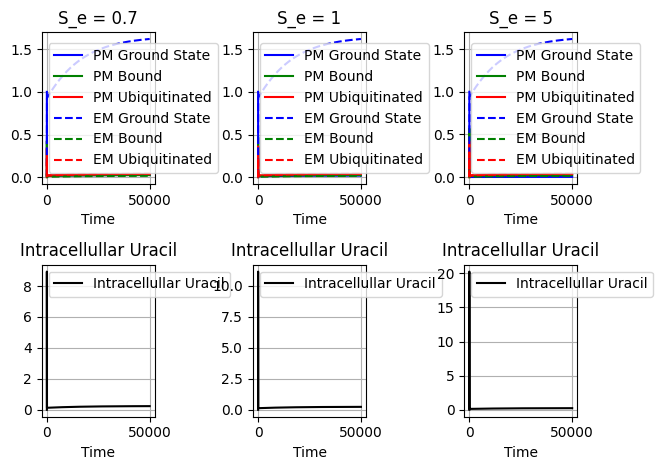

In [6]:
#Going through each rate
for i in range(3):
    #Defining Extracellular Uracil
    S_e = rates[i]
    #Defining subplot
    plt1 = plt.subplot(int(f"23{i+1}"))
    #Finding solution to ODE
    sol = odeint(func,y0,t,args = (a,A_e,A_p,b,f,g,j,k,K_m,S_e,v_m,V,W,y,z))
    #Plotting solution
    plt1.plot(t,sol[:,0],'b',label = "PM Ground State")
    plt1.plot(t,sol[:,1],'g',label = "PM Bound")
    plt1.plot(t,sol[:,2],'r',label = "PM Ubiquitinated")
    plt1.plot(t,sol[:,3],'b--',label = "EM Ground State")
    plt1.plot(t,sol[:,4],'g--',label = "EM Bound")
    plt1.plot(t,sol[:,5],'r--',label = "EM Ubiquitinated")
    plt1.set_xlabel("Time")
    plt.legend()
    plt.grid()
    plt1.set_title(f"S_e = {S_e}")
    plt2 = plt.subplot(int(f"23{i+4}"))
    plt2.plot(t,sol[:,6],'k',label = "Intracellullar Uracil")
    plt2.set_xlabel("Time")
    plt2.set_title("Intracellullar Uracil")
    #Setting graph layout
    plt.legend()
    plt.grid()
    plt1.set_xlabel("Time")
    print(sol[:,0][-1])


plt.tight_layout()
plt.show()